In [1]:
import warnings
warnings.filterwarnings('ignore')

# Prepare the Dataset

In [2]:
dataset_name = 'MNIST'

In [3]:
import numpy as np
from skimage.color import grey2rgb
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()
X = np.concatenate((X, X_test))
y = np.concatenate((y, y_test))
imgs = X
del X_test
del y_test

imgs = X

X = np.array(list(map(lambda x: grey2rgb(x), X)), dtype=np.float32)
X = X.astype(np.float32)/ 255.0

print('Dataset size {}'.format(X.shape))

Using TensorFlow backend.


Dataset size (70000, 28, 28, 3)


## Dimension Reduction for plotting

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.reshape((X.shape[0], -1)))


## Plotting the original data set

In [6]:
import random
randomindexs = list()
for i in range(6000):
    randomindexs.append(random.randint(0,len(X_pca)-1))

In [7]:
from _utils.plots import plot_dataset

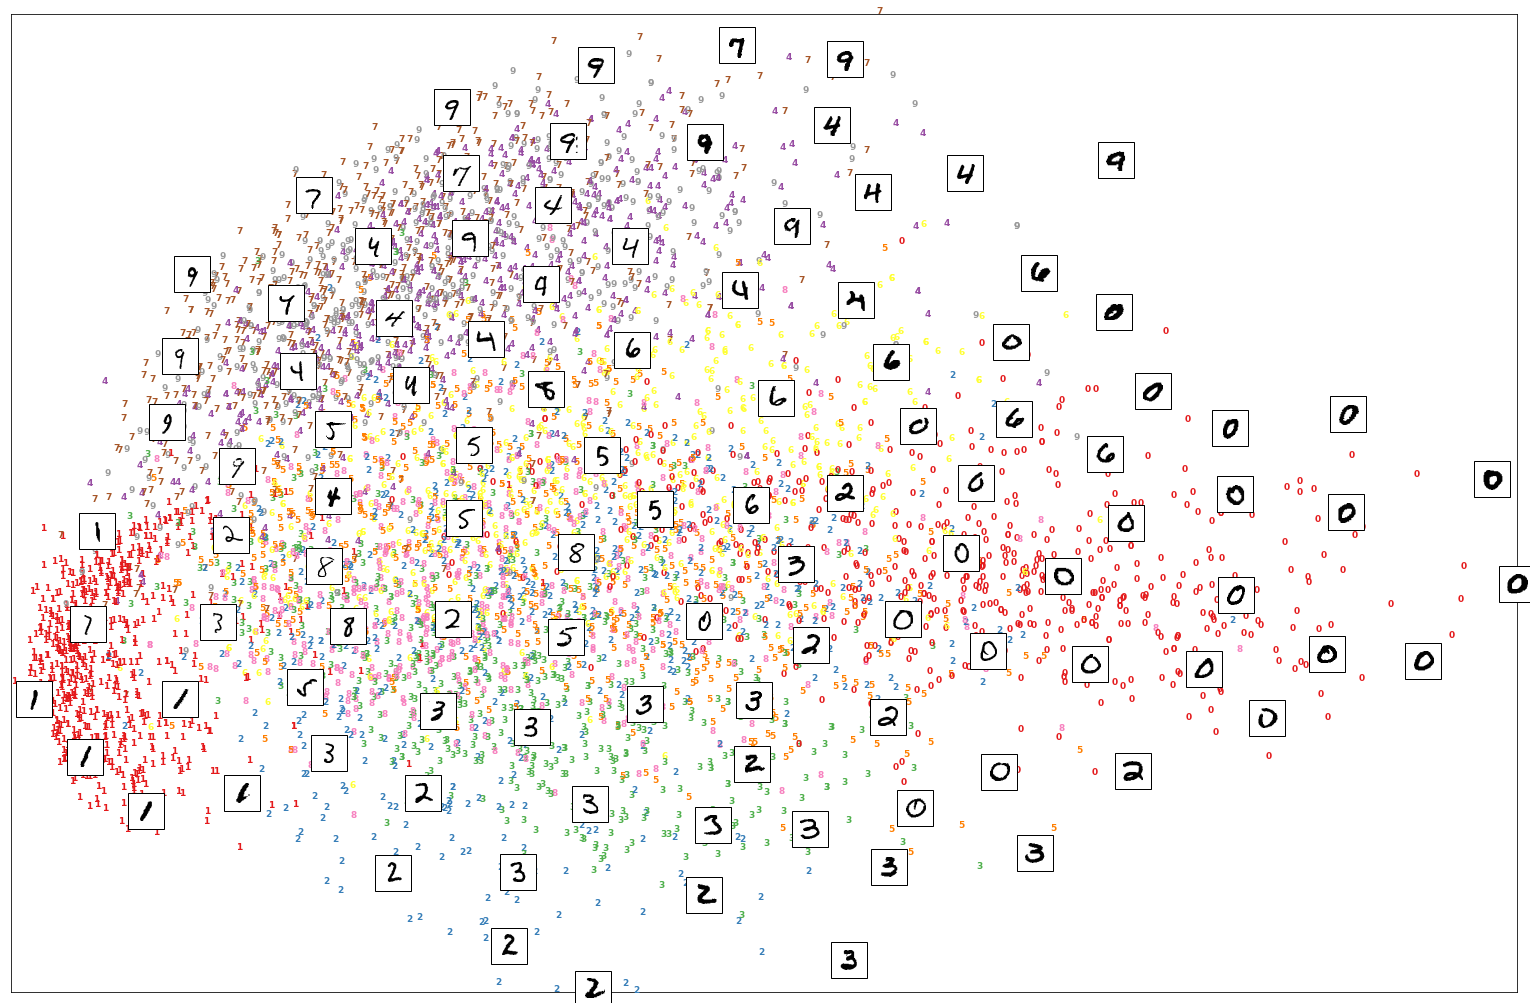

In [8]:
plot_dataset(X_pca[randomindexs], y[randomindexs],images=imgs[randomindexs])

## Linear Separability Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html

https://www.cs.waikato.ac.nz/~eibe/pubs/chains.pdf

In [9]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

from _utils.plots import plot_transform_hyperplanes

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.1745
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.175


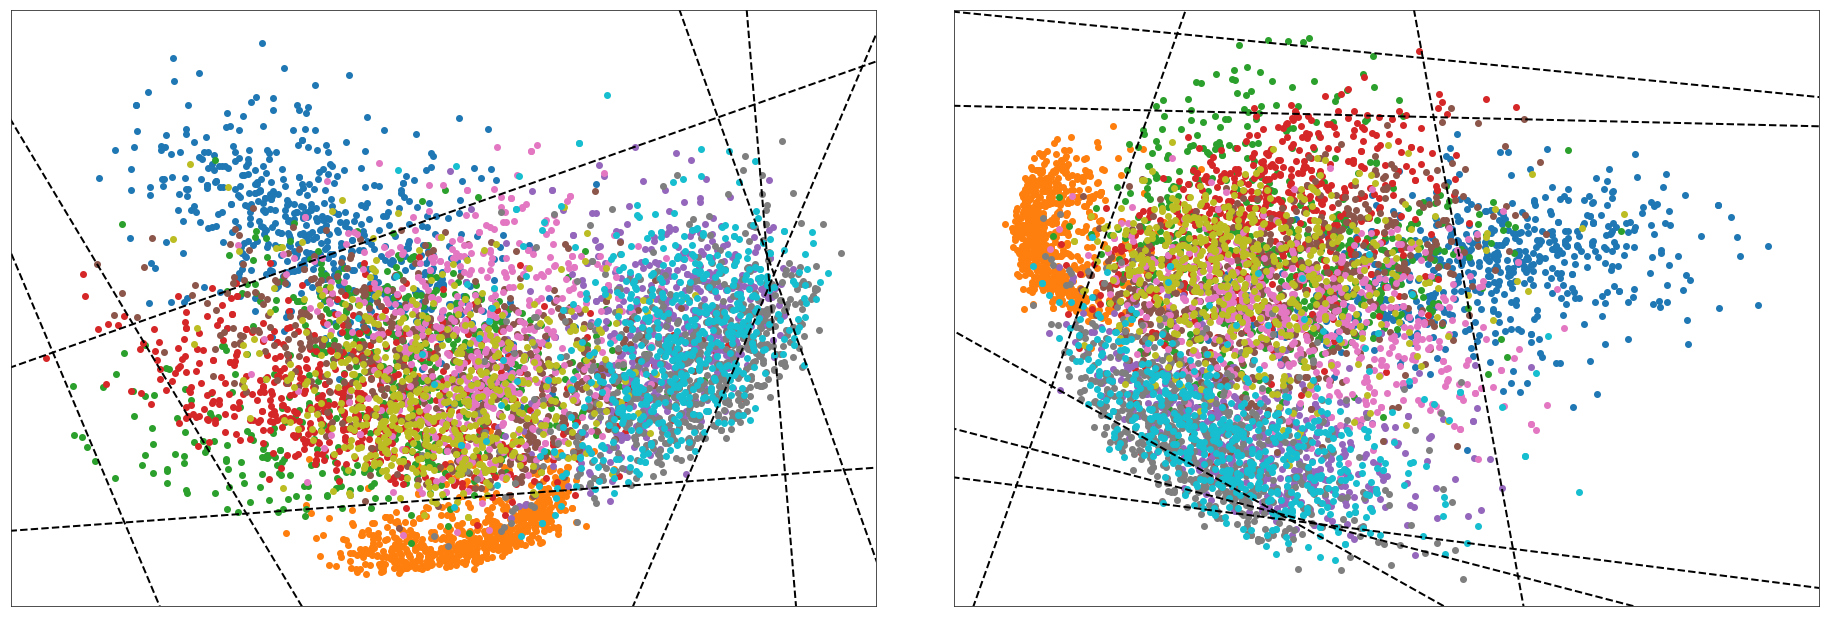

In [11]:
plot_transform_hyperplanes(X_pca[randomindexs], pd.get_dummies(y[randomindexs]).values)

# tSNE embedding transforamtion

https://lvdmaaten.github.io/tsne/

https://github.com/KlugerLab/FIt-SNE

https://github.com/spotify/annoy

http://www.fftw.org/    

In [12]:
from FIt_SNE.fast_tsne import fast_tsne

In [13]:
Z_embedded1 = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=1,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

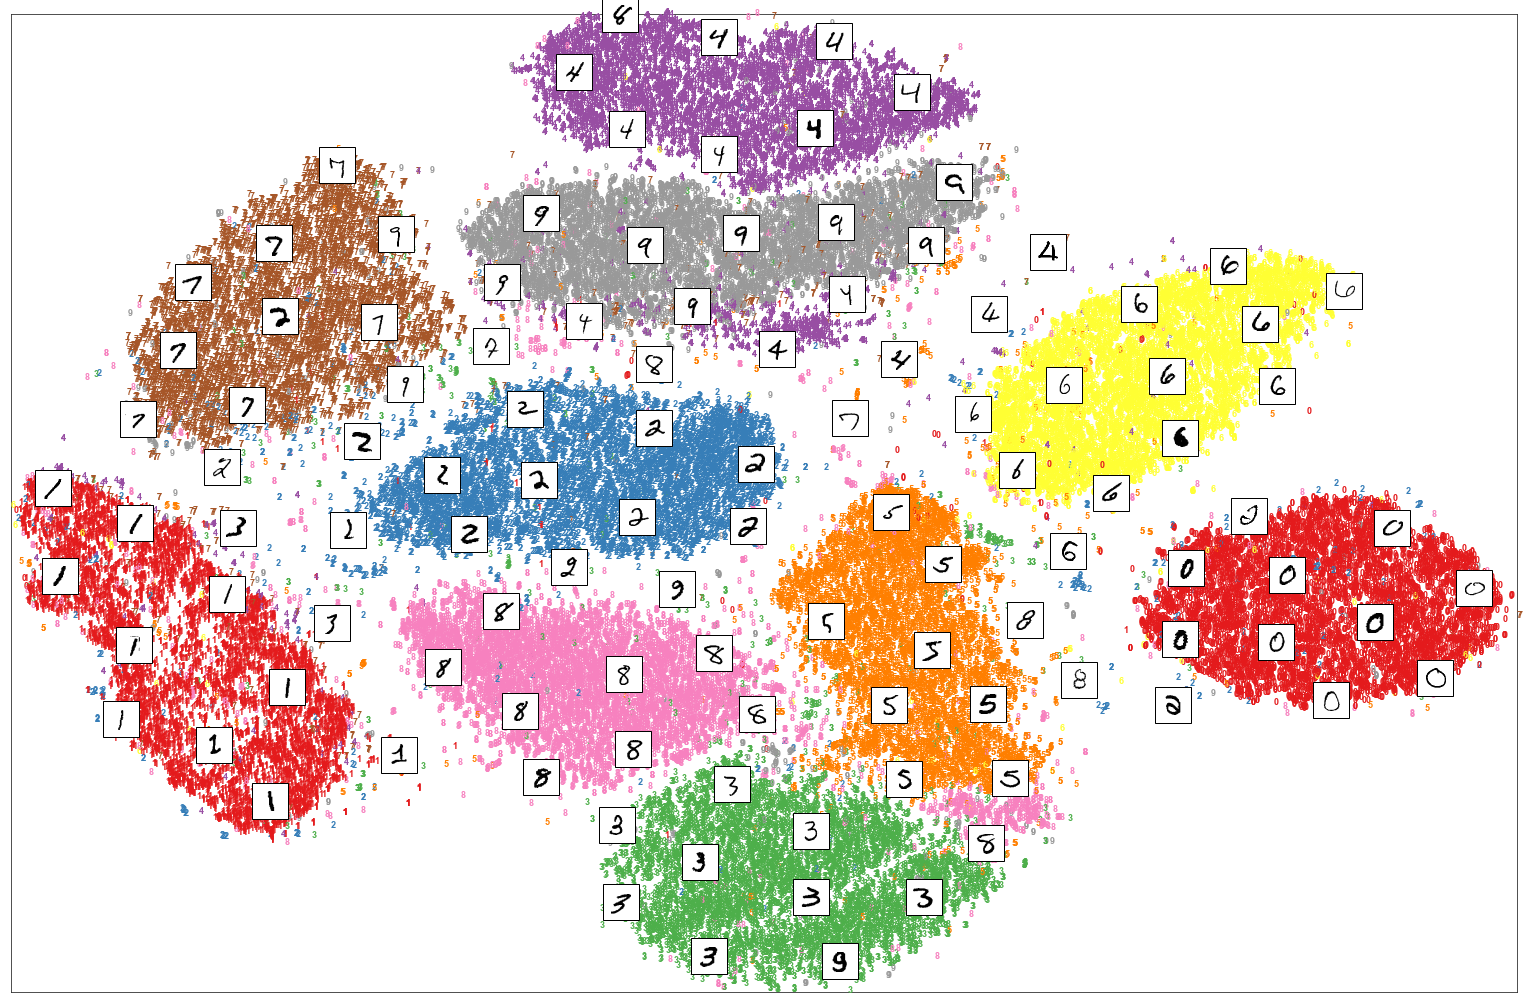

In [14]:
plot_dataset(Z_embedded1, y,images=imgs)

In [15]:
Z_embedded = fast_tsne(X.reshape((X.shape[0], -1)), 
                         learning_rate=1000, max_iter=5000,
                         n_trees=500, perplexity=100,
                         initialization=X_pca, 
                         df=0.4,
                         early_exag_coeff=15,  
                         late_exag_coeff=5)

In [16]:
#Z1 = fast_tsne(X.reshape((X.shape[0], -1)), 
#                         learning_rate=1000,
#                         n_trees=100,
#                         initialization=X_pca, 
#                         df=0.4,
#                         late_exag_coeff=5)
#

#=============== t-SNE v1.1.0 ===============
#fast_tsne data_path: data.dat
#fast_tsne result_path: result.dat
#fast_tsne nthreads: 12
#Read the following parameters:
#n 70000 by d 2352 dataset, theta 0.500000,
###########perplexity 100.000000, no_dims 2, max_iter 5000,
###########stop_lying_iter 250, mom_switch_iter 250,
###########momentum 0.500000, final_momentum 0.800000,
###########learning_rate 1000.000000, K -1, sigma -1.000000, nbody_algo 2,
###########knn_algo 1, early_exag_coeff 15.000000,
###########no_momentum_during_exag 0, n_trees 500, search_k 150000,
###########start_late_exag_iter -1, late_exag_coeff 5.000000
###########nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 0.400000
#Read the 70000 x 2352 data matrix successfully. X[0,0] = 0.000000
#Read the initialization successfully.
#Will use momentum during exaggeration phase
#Computing input similarities...
#Using perplexity, so normalizing input data (to prevent numerical problems)
#Using perplexity, not the manually set kernel width.  K (number of nearest neighbors) and sigma (bandwidth) parameters are going to be ignored.
#Using ANNOY for knn search, with parameters: n_trees 500 and search_k 150000
#Going to allocate memory. N: 70000, K: 300, N*K = 21000000
#Building Annoy tree...
#Done building tree. Beginning nearest neighbor search...
#parallel (12 threads):
#[===========================================================>] 99% 966.364s
#Symmetrizing...
#Using the given initialization.
#Exaggerating Ps by 15.000000
#Input similarities computed (sparsity = 0.006089)!
#Learning embedding...
#Using FIt-SNE approximation.
#Iteration 50 (50 iterations in 3.19 seconds), cost 5.223370
#Iteration 100 (50 iterations in 3.07 seconds), cost 5.358206
#Iteration 150 (50 iterations in 3.06 seconds), cost 5.359514
#Iteration 200 (50 iterations in 3.05 seconds), cost 5.368907
#Iteration 250 (50 iterations in 3.08 seconds), cost 5.386517
#Unexaggerating Ps by 15.000000
#Iteration 300 (50 iterations in 3.10 seconds), cost 4.978956
#Iteration 350 (50 iterations in 3.11 seconds), cost 4.795554
#Iteration 400 (50 iterations in 3.09 seconds), cost 4.661290
#Iteration 450 (50 iterations in 3.10 seconds), cost 4.561168
#Iteration 500 (50 iterations in 3.11 seconds), cost 4.479394
#Iteration 550 (50 iterations in 3.09 seconds), cost 4.414495
#Iteration 600 (50 iterations in 3.14 seconds), cost 4.355900
#Iteration 650 (50 iterations in 3.10 seconds), cost 4.307595
#Iteration 700 (50 iterations in 3.25 seconds), cost 4.264692
#Iteration 750 (50 iterations in 3.37 seconds), cost 4.227939
#Iteration 800 (50 iterations in 3.45 seconds), cost 4.192941
#Iteration 850 (50 iterations in 3.67 seconds), cost 4.161813
#Iteration 900 (50 iterations in 3.78 seconds), cost 4.131796
#Iteration 950 (50 iterations in 3.93 seconds), cost 4.106997
#Iteration 1000 (50 iterations in 4.39 seconds), cost 4.082510
#Iteration 1050 (50 iterations in 5.20 seconds), cost 4.060323
#Iteration 1100 (50 iterations in 4.49 seconds), cost 4.037466
#Iteration 1150 (50 iterations in 4.47 seconds), cost 4.018927
#Iteration 1200 (50 iterations in 4.94 seconds), cost 4.000060
#Iteration 1250 (50 iterations in 5.34 seconds), cost 3.984210
#Iteration 1300 (50 iterations in 5.43 seconds), cost 3.969143
#Iteration 1350 (50 iterations in 5.79 seconds), cost 3.954464
#Iteration 1400 (50 iterations in 5.80 seconds), cost 3.941854
#Iteration 1450 (50 iterations in 5.95 seconds), cost 3.931653
#Iteration 1500 (50 iterations in 6.33 seconds), cost 3.920789
#Iteration 1550 (50 iterations in 6.32 seconds), cost 3.910634
#Iteration 1600 (50 iterations in 6.93 seconds), cost 3.901158
#Iteration 1650 (50 iterations in 7.08 seconds), cost 3.891874
#Iteration 1700 (50 iterations in 7.25 seconds), cost 3.880899
#Iteration 1750 (50 iterations in 7.90 seconds), cost 3.871057
#Iteration 1800 (50 iterations in 7.93 seconds), cost 3.865723
#Iteration 1850 (50 iterations in 8.64 seconds), cost 3.854658
#Iteration 1900 (50 iterations in 9.34 seconds), cost 3.847961
#Iteration 1950 (50 iterations in 9.31 seconds), cost 3.840698
#Iteration 2000 (50 iterations in 9.32 seconds), cost 3.833762
#Iteration 2050 (50 iterations in 9.35 seconds), cost 3.826822
#Iteration 2100 (50 iterations in 9.33 seconds), cost 3.819955
#Iteration 2150 (50 iterations in 9.35 seconds), cost 3.813552
#Iteration 2200 (50 iterations in 10.54 seconds), cost 3.808808
#Iteration 2250 (50 iterations in 11.51 seconds), cost 3.801205
#Iteration 2300 (50 iterations in 11.61 seconds), cost 3.795925
#Iteration 2350 (50 iterations in 11.53 seconds), cost 3.789989
#Iteration 2400 (50 iterations in 11.48 seconds), cost 3.783956
#Iteration 2450 (50 iterations in 11.53 seconds), cost 3.779776
#Iteration 2500 (50 iterations in 11.53 seconds), cost 3.772049
#Iteration 2550 (50 iterations in 11.47 seconds), cost 3.769732
#Iteration 2600 (50 iterations in 22.46 seconds), cost 3.764731
#Iteration 2650 (50 iterations in 24.60 seconds), cost 3.760279
#Iteration 2700 (50 iterations in 17.09 seconds), cost 3.757955
#Iteration 2750 (50 iterations in 23.00 seconds), cost 3.754956
#Iteration 2800 (50 iterations in 28.48 seconds), cost 3.753456
#Iteration 2850 (50 iterations in 17.77 seconds), cost 3.750348
#Iteration 2900 (50 iterations in 32.29 seconds), cost 3.752274
#Iteration 2950 (50 iterations in 23.18 seconds), cost 3.748375
#Iteration 3000 (50 iterations in 29.87 seconds), cost 3.748502
#Iteration 3050 (50 iterations in 22.92 seconds), cost 3.748177
#Iteration 3100 (50 iterations in 26.88 seconds), cost 3.746466
#Iteration 3150 (50 iterations in 22.22 seconds), cost 3.745205
#Iteration 3200 (50 iterations in 24.70 seconds), cost 3.744340
#Iteration 3250 (50 iterations in 25.05 seconds), cost 3.742902
#Iteration 3300 (50 iterations in 31.11 seconds), cost 3.744235
#Iteration 3350 (50 iterations in 24.83 seconds), cost 3.743046
#Iteration 3400 (50 iterations in 27.56 seconds), cost 3.743381
#Iteration 3450 (50 iterations in 31.52 seconds), cost 3.742642
#Iteration 3500 (50 iterations in 20.47 seconds), cost 3.740258
#Iteration 3550 (50 iterations in 30.14 seconds), cost 3.741569
#Iteration 3600 (50 iterations in 28.95 seconds), cost 3.740441
#Iteration 3650 (50 iterations in 32.81 seconds), cost 3.738371
#Iteration 3700 (50 iterations in 33.84 seconds), cost 3.737776
#Iteration 3750 (50 iterations in 28.29 seconds), cost 3.739029
#Iteration 3800 (50 iterations in 27.08 seconds), cost 3.737627
#Iteration 3850 (50 iterations in 29.58 seconds), cost 3.735177
#Iteration 3900 (50 iterations in 27.92 seconds), cost 3.736178
#Iteration 3950 (50 iterations in 22.10 seconds), cost 3.735106
#Iteration 4000 (50 iterations in 40.10 seconds), cost 3.734065
#Iteration 4050 (50 iterations in 39.25 seconds), cost 3.733084
#Iteration 4100 (50 iterations in 33.35 seconds), cost 3.733208
#Iteration 4150 (50 iterations in 24.60 seconds), cost 3.732584
#Iteration 4200 (50 iterations in 37.86 seconds), cost 3.732636
#Iteration 4250 (50 iterations in 45.33 seconds), cost 3.727637
#Iteration 4300 (50 iterations in 41.13 seconds), cost 3.730212
#Iteration 4350 (50 iterations in 19.00 seconds), cost 3.729825
#Iteration 4400 (50 iterations in 41.59 seconds), cost 3.729056
#Iteration 4450 (50 iterations in 45.54 seconds), cost 3.726625
#Iteration 4500 (50 iterations in 27.47 seconds), cost 3.728691
#Iteration 4550 (50 iterations in 34.67 seconds), cost 3.725371
#Iteration 4600 (50 iterations in 47.31 seconds), cost 3.726040
#Iteration 4650 (50 iterations in 44.39 seconds), cost 3.724478
#Iteration 4700 (50 iterations in 43.77 seconds), cost 3.724342
#Iteration 4750 (50 iterations in 40.98 seconds), cost 3.723271
#Iteration 4800 (50 iterations in 21.78 seconds), cost 3.721027
#Iteration 4850 (50 iterations in 45.87 seconds), cost 3.720994
#Iteration 4900 (50 iterations in 55.99 seconds), cost 3.719883
#Iteration 4950 (50 iterations in 36.20 seconds), cost 3.718239
#Iteration 5000 (50 iterations in 29.27 seconds), cost 3.717515
#Wrote the 70000 x 2 data matrix successfully.
#Done.

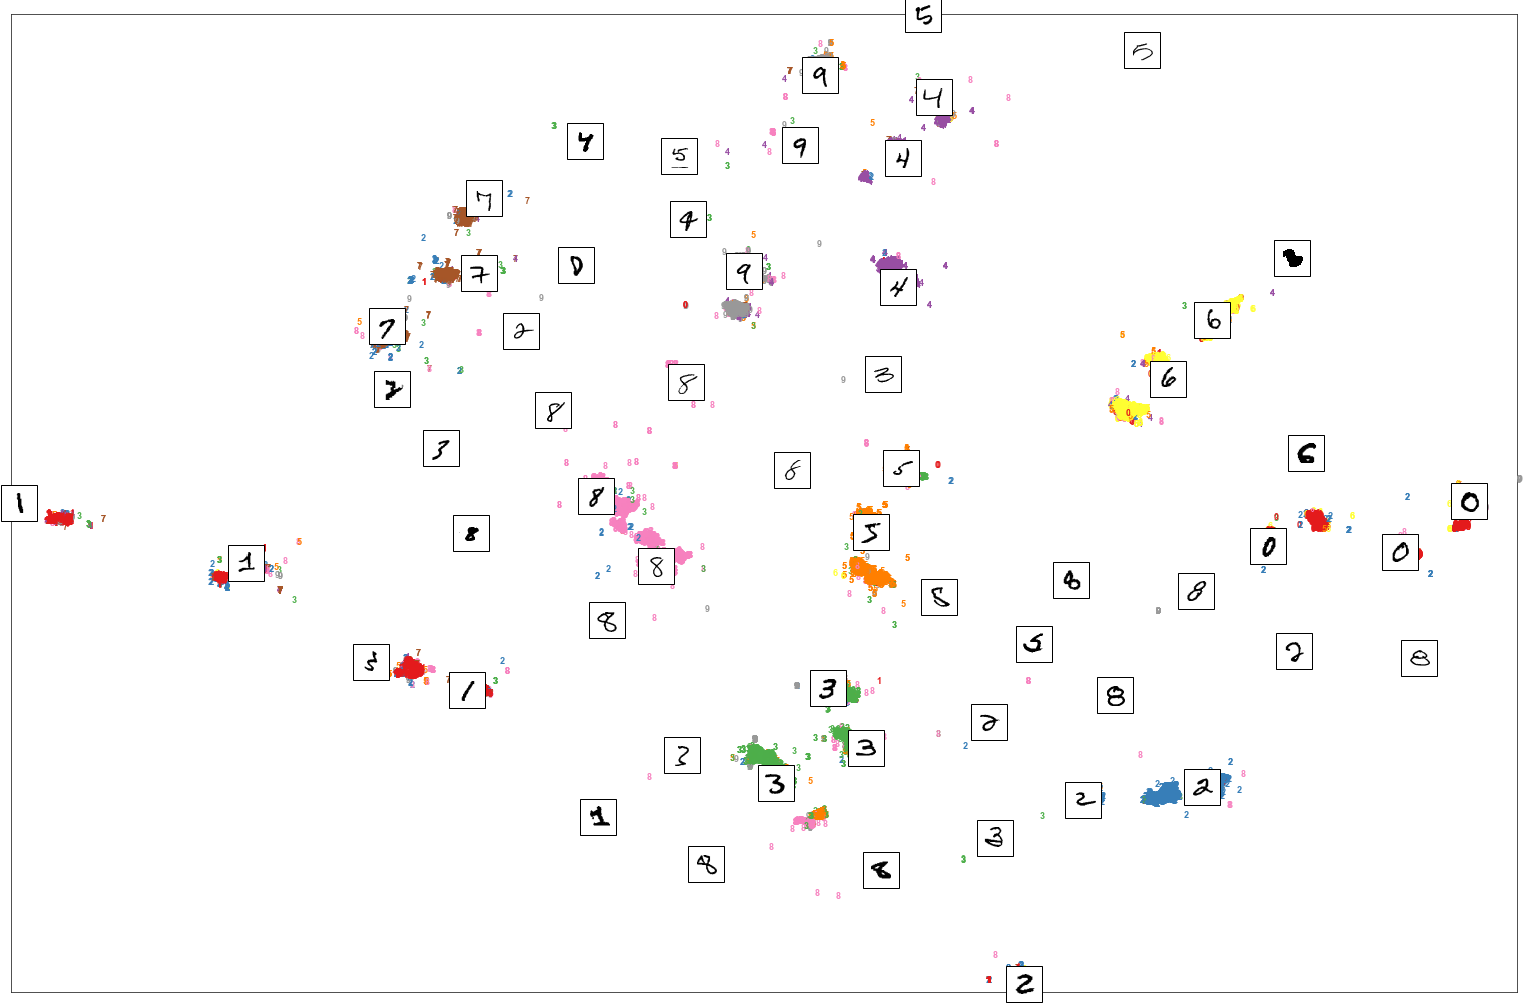

In [17]:
plot_dataset(Z_embedded, y,images=imgs, 
             save='./experiments/manifold generation/{} FIt-SNE embedding manifold.jpg'.format(dataset_name))

https://en.wikipedia.org/wiki/Accuracy_and_precision

https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

https://kite.com/python/docs/sklearn.utils.linear_assignment_.linear_assignment

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.2901666666666667
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.301


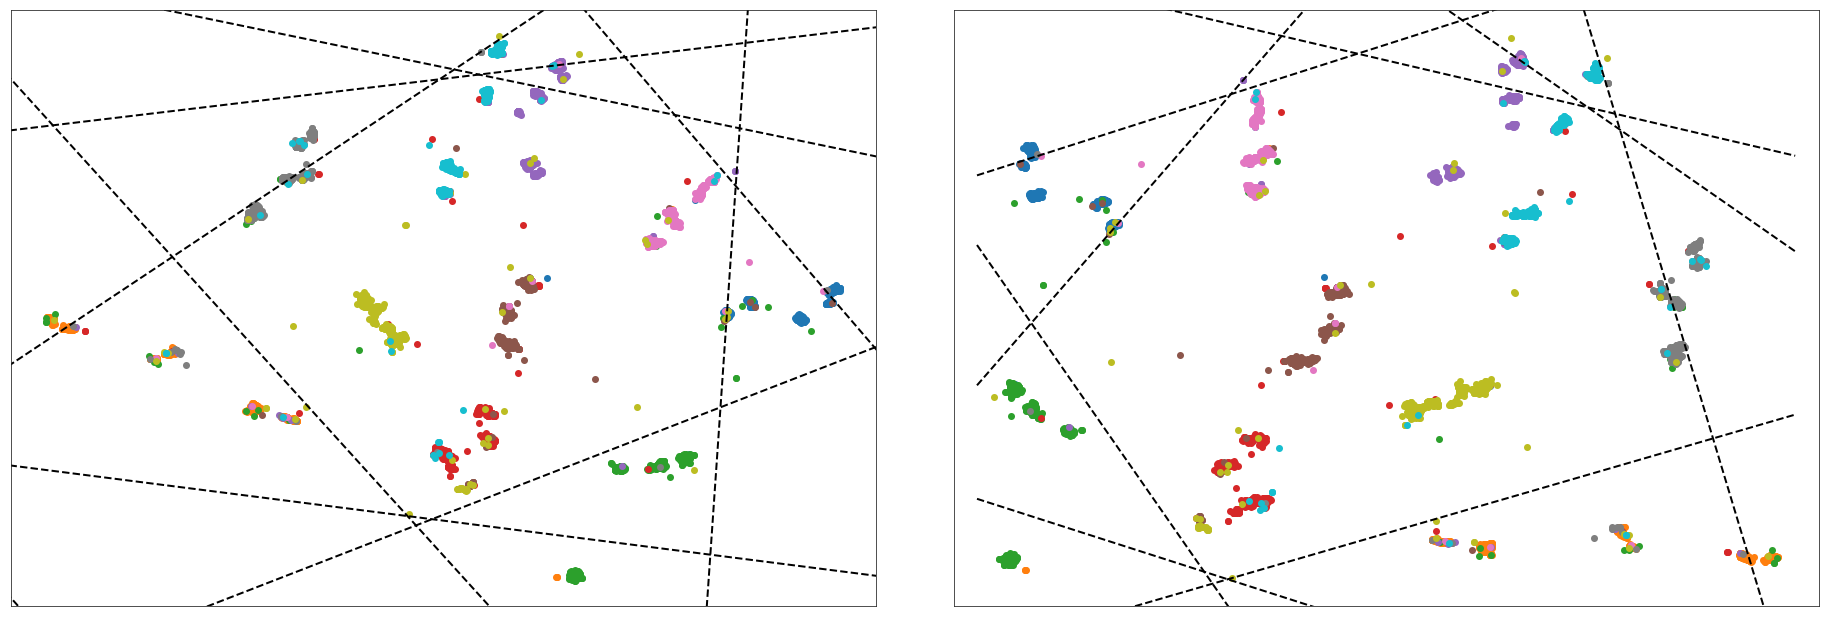

In [18]:
plot_transform_hyperplanes(Z_embedded[randomindexs], pd.get_dummies(y[randomindexs]).values)

In [19]:
from _utils.evaluate import evaluate_clustering 

# Clustering The Z-space

In [20]:
n_clusters = len(np.unique(y[randomindexs]))

In [21]:
# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [22]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3359285714285714
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3358714285714286


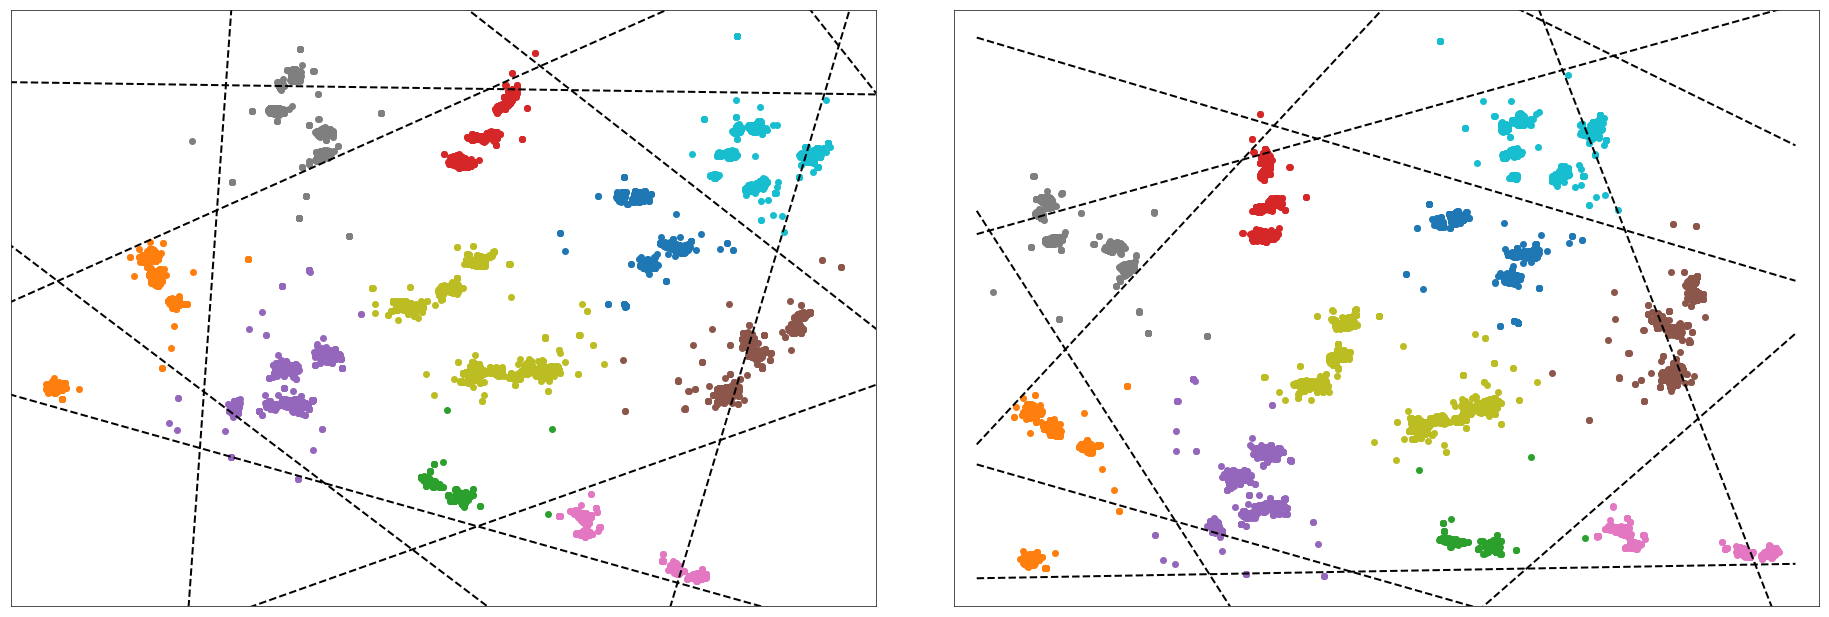

In [23]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [24]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using MiniBatchKMeans, time elapesd 0.3430900573730469
Clustering Accuracy 0.7432142857142857
Clustering purity 0.7902285714285714
Clustering homogeneity 0.7856652510525319
Clustering adjusted_rand_score 0.7018553090504089
Clustering adjusted_mutual_info_score 0.7856113305262001
Clustering completeness_score 0.7996873994344951
Clustering v_measure_score 0.7926143136004934


## Spectral Clustering

In [25]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.6729428571428572
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.6726142857142857


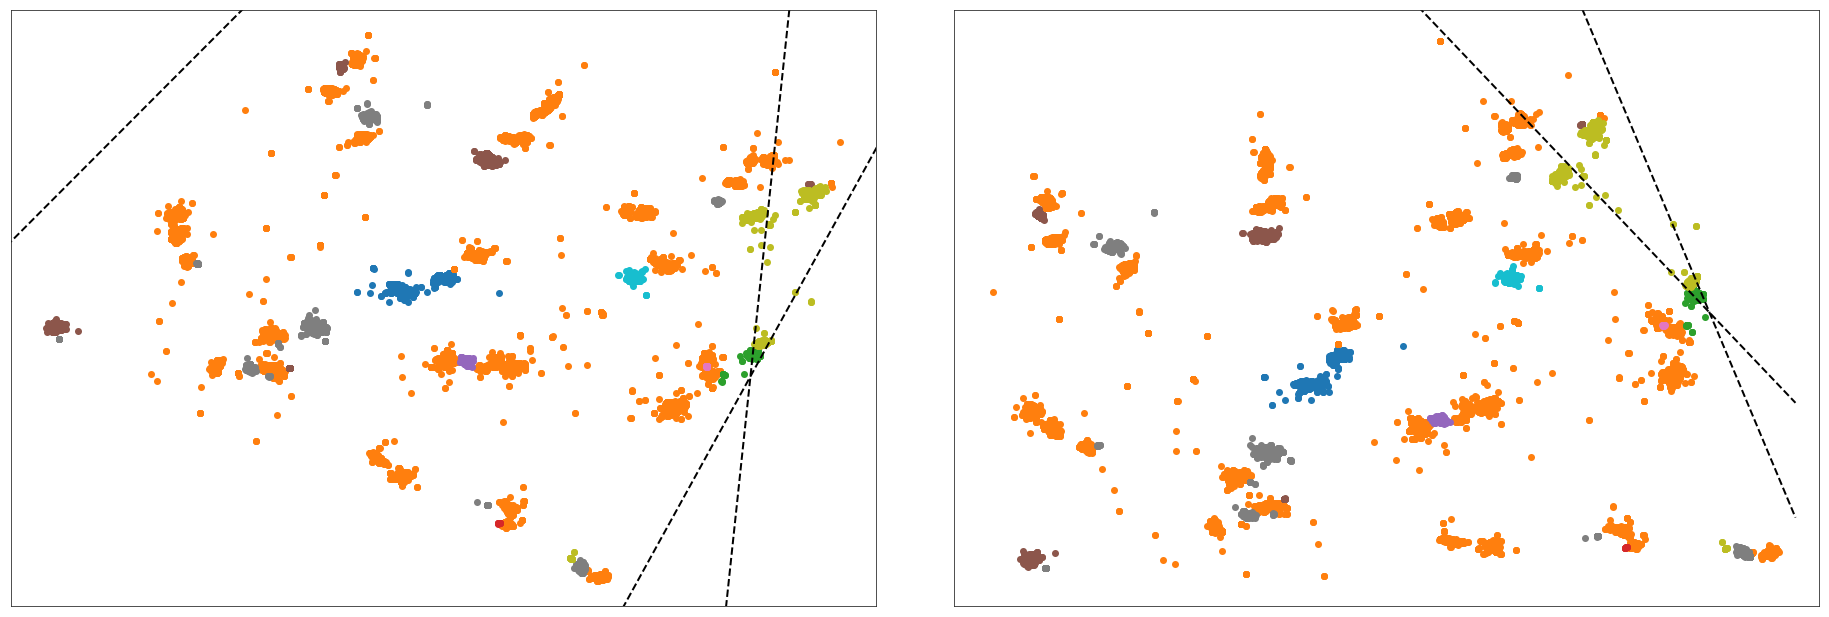

In [26]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [27]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using SpectralClustering, time elapesd 1761.823445558548
Clustering Accuracy 0.2870142857142857
Clustering purity 0.3060285714285714
Clustering homogeneity 0.21589129678484836
Clustering adjusted_rand_score 0.04615418231793313
Clustering adjusted_mutual_info_score 0.21568643470983348
Clustering completeness_score 0.4102908258345495
Clustering v_measure_score 0.28291519431379974


## Ward

In [28]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3358714285714286
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.33581428571428573


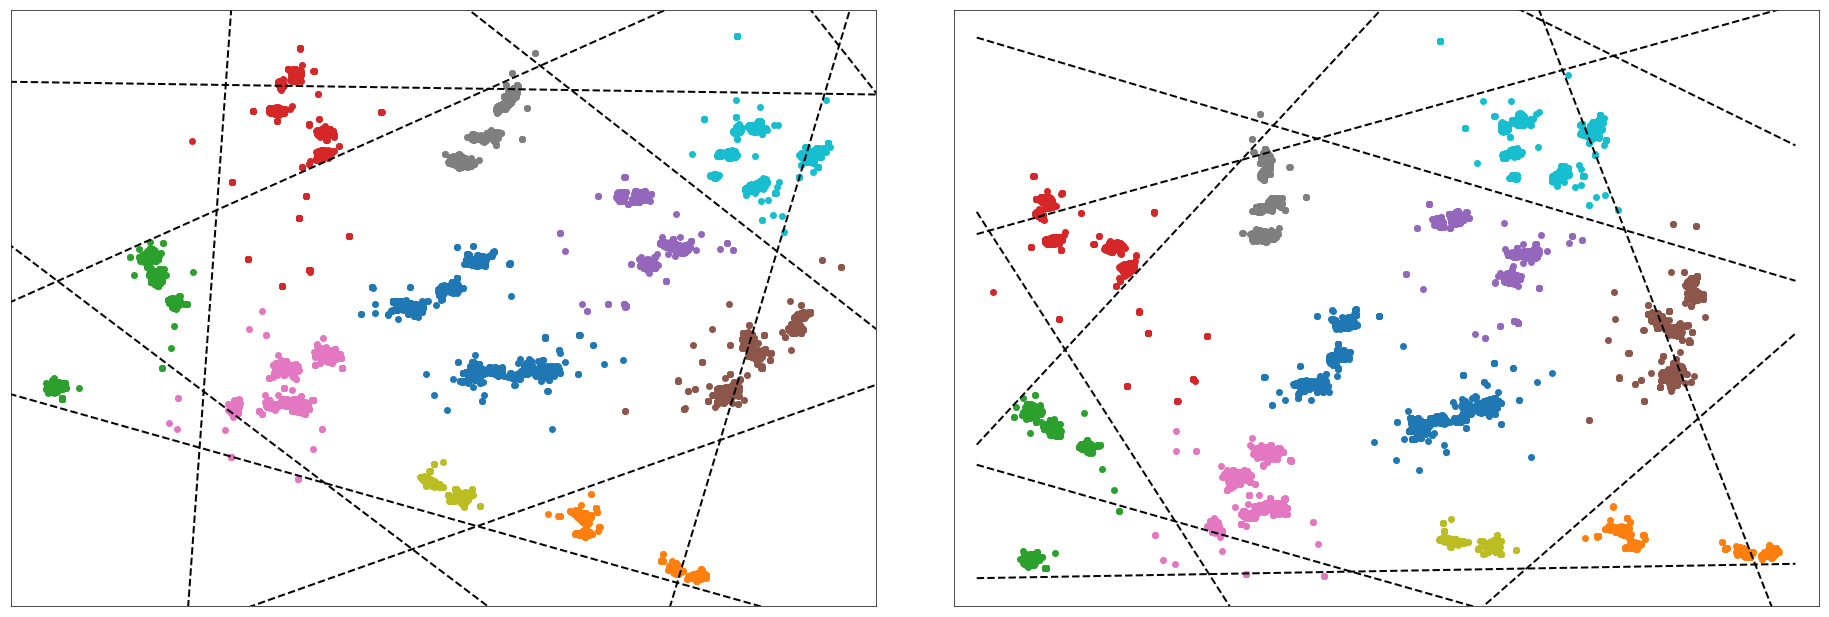

In [29]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [30]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using Ward, time elapesd 102.72167348861694
Clustering Accuracy 0.7431428571428571
Clustering purity 0.7901571428571429
Clustering homogeneity 0.7852504958530845
Clustering adjusted_rand_score 0.7016773501168343
Clustering adjusted_mutual_info_score 0.7851964709851138
Clustering completeness_score 0.799266702376819
Clustering v_measure_score 0.7921966073468801


## Birch

In [31]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.31605714285714287
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3160142857142857


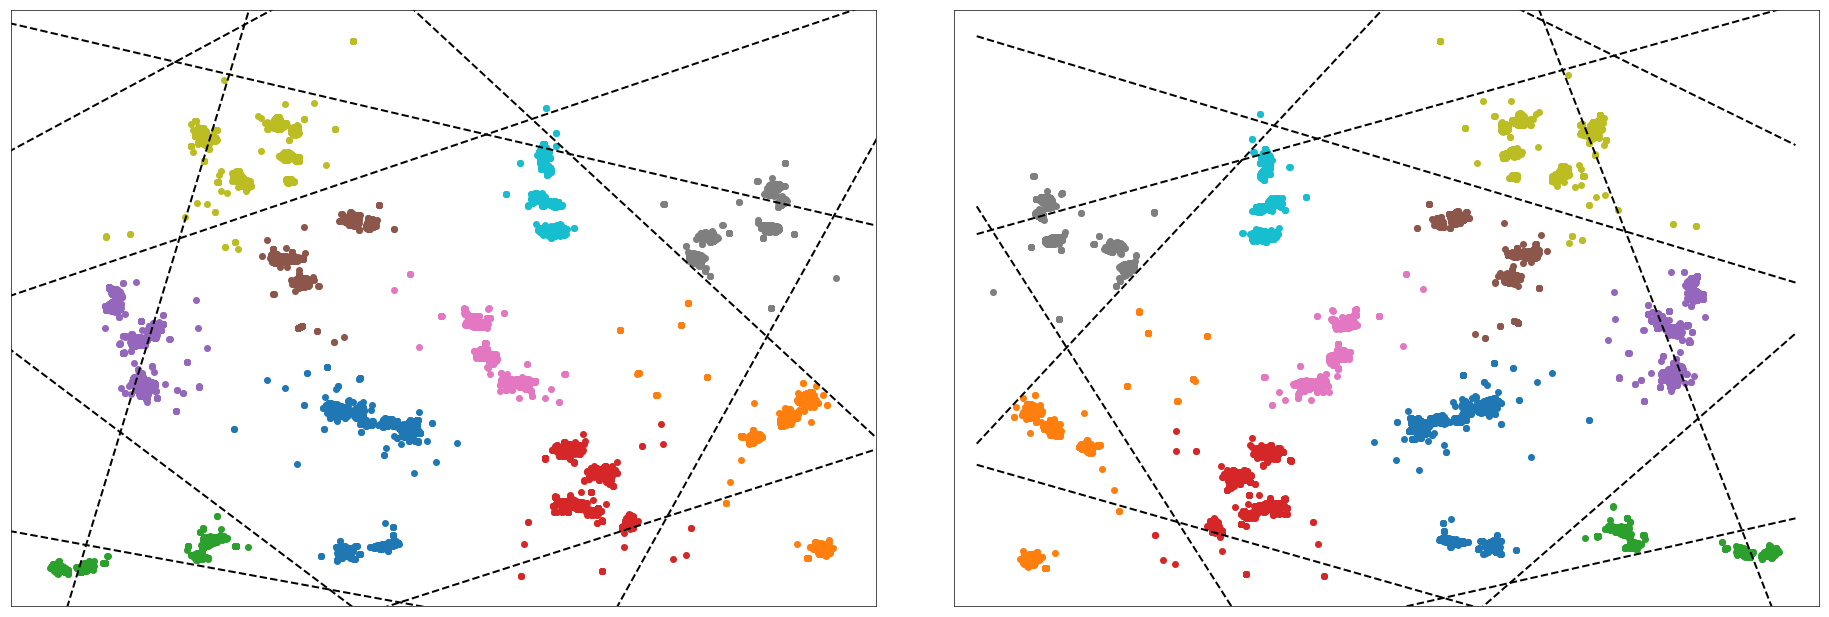

In [32]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [33]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using Birch, time elapesd 4.7708704471588135
Clustering Accuracy 0.8217428571428571
Clustering purity 0.8217428571428571
Clustering homogeneity 0.7962207428086049
Clustering adjusted_rand_score 0.7242572870680622
Clustering adjusted_mutual_info_score 0.7961694786857441
Clustering completeness_score 0.8009160980393467
Clustering v_measure_score 0.79856151858558


## Gaussian Mixture

In [34]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3160428571428571
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.3159


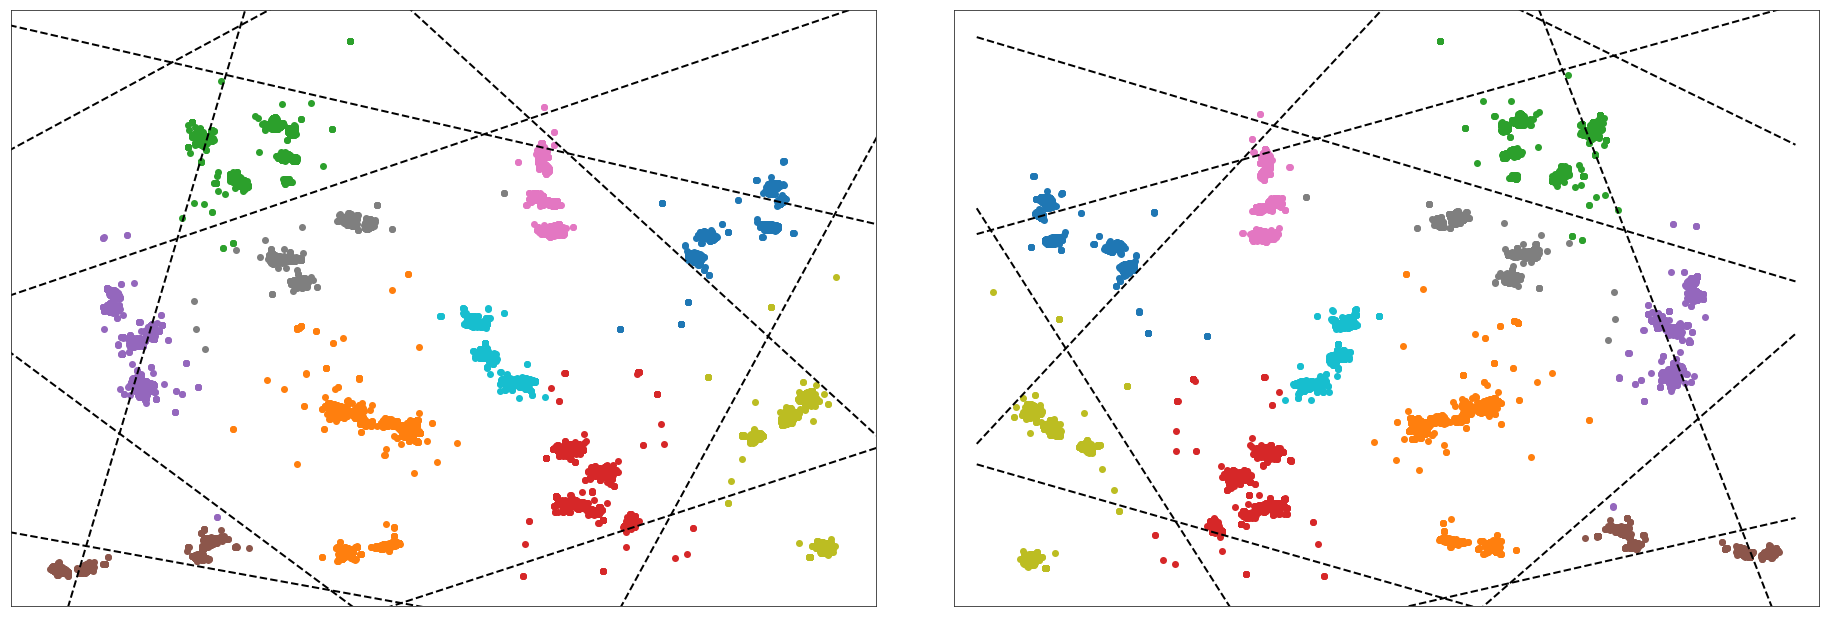

In [35]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [36]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 10
n_clusters orignial 10
n_clusters detected 10
n unclustered points 0 out of 70000
Clustering using GaussianMixture, time elapesd 1.1941485404968262
Clustering Accuracy 0.8222285714285714
Clustering purity 0.8222285714285714
Clustering homogeneity 0.7974752804051419
Clustering adjusted_rand_score 0.7249497627906482
Clustering adjusted_mutual_info_score 0.7974243318740561
Clustering completeness_score 0.8022857088861495
Clustering v_measure_score 0.7998732622458292


## DBSCAN

In [37]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06592857142857143
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07015714285714286


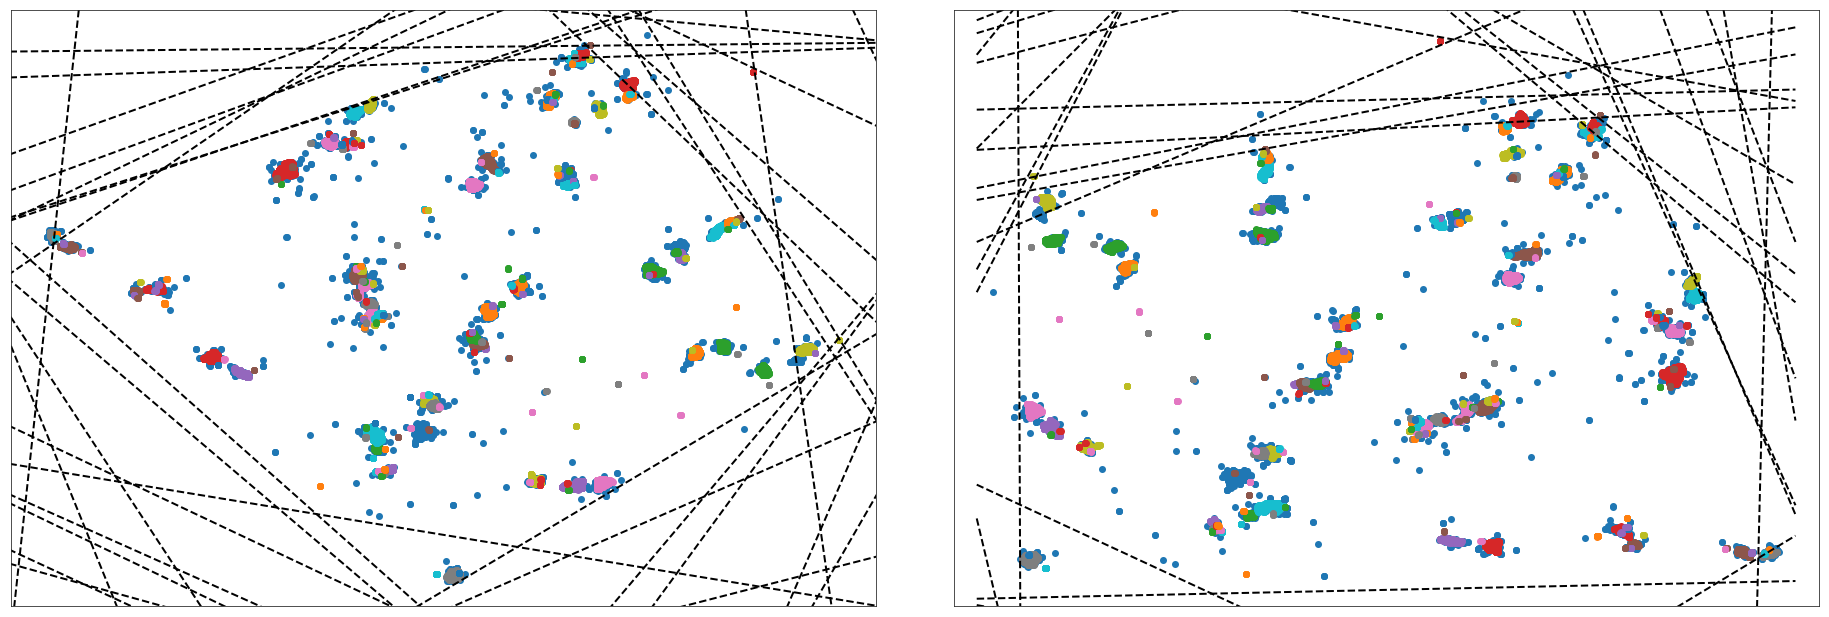

In [38]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)


### Clustering Metrics

In [39]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 10
n_clusters orignial 10
n_clusters detected 208
n unclustered points 1992 out of 70000
Clustering using DBSCAN, time elapesd 1.3301377296447754
Clustering Accuracy 0.2775261733913657
Clustering purity 0.9736648629572991
Clustering homogeneity 0.9373847976565883
Clustering adjusted_rand_score 0.30319022353366615
Clustering adjusted_mutual_info_score 0.5340244038716687
Clustering completeness_score 0.5357370682319974
Clustering v_measure_score 0.6818061627221359


## HDBSCAN

In [40]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()
    
    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06862857142857143
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07502857142857143


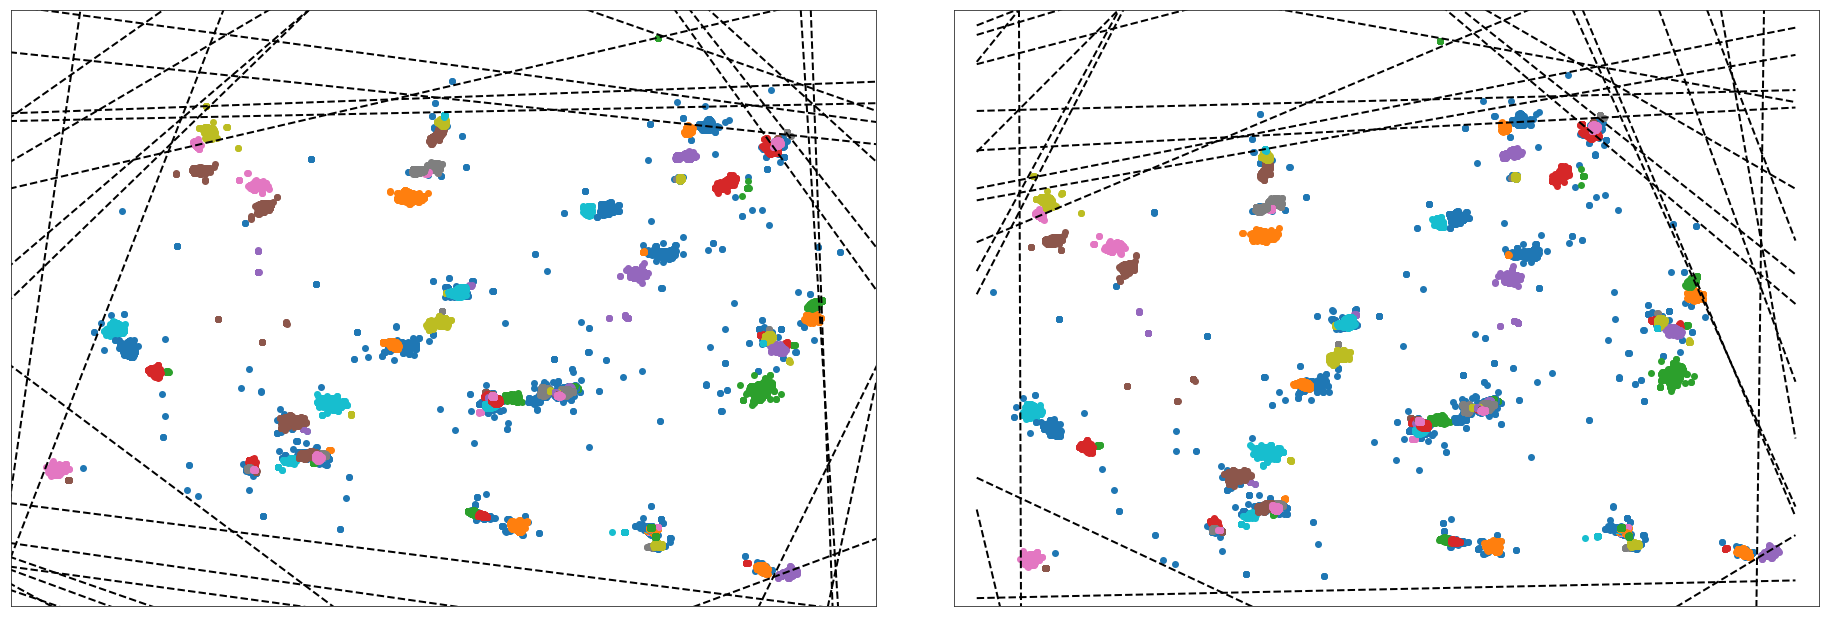

In [41]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [42]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 10
n_clusters orignial 10
n_clusters detected 123
n unclustered points 1978 out of 70000
Clustering using HDBSCAN, time elapesd 1.6218054294586182
Clustering Accuracy 0.27044191585075417
Clustering purity 0.9679515450883538
Clustering homogeneity 0.9247908439774003
Clustering adjusted_rand_score 0.29493120226146663
Clustering adjusted_mutual_info_score 0.5255485892827532
Clustering completeness_score 0.5265596056654752
Clustering v_measure_score 0.6710405501959977


# Choose number of clusters equals to Harmonic Mean of STD

In [43]:
from scipy.stats import hmean
n_clusters = int(hmean(X.reshape((X.shape[0], -1)).std(axis=1))*255)

In [44]:

# estimate bandwidth for mean shift
from sklearn import cluster, mixture
import hdbscan

from sklearn.neighbors import kneighbors_graph
# connectivity matrix for structured Ward
connectivity = kneighbors_graph(Z_embedded, n_neighbors=n_clusters, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)

# ============
# Create cluster objects
# ============
two_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
spectral = cluster.SpectralClustering(n_clusters=n_clusters, eigen_solver='arpack', affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=0.2)
affinity_propagation = cluster.AffinityPropagation()
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
hdbscan_ = hdbscan.HDBSCAN(min_cluster_size=n_clusters, gen_min_span_tree=False)

clustering_algorithms = (
    ('MiniBatchKMeans', two_means),
    ('SpectralClustering', spectral),
    ('Ward', ward),
    ('Birch', birch),
    ('GaussianMixture', gmm),
    ('DBSCAN', dbscan),
    ('HDBSCAN', hdbscan_)
)


## MiniBatch KMeans

In [45]:
import time
for name, algorithm in [clustering_algorithms[0]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting MiniBatchKMeans


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.048214285714285716
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.05501428571428572


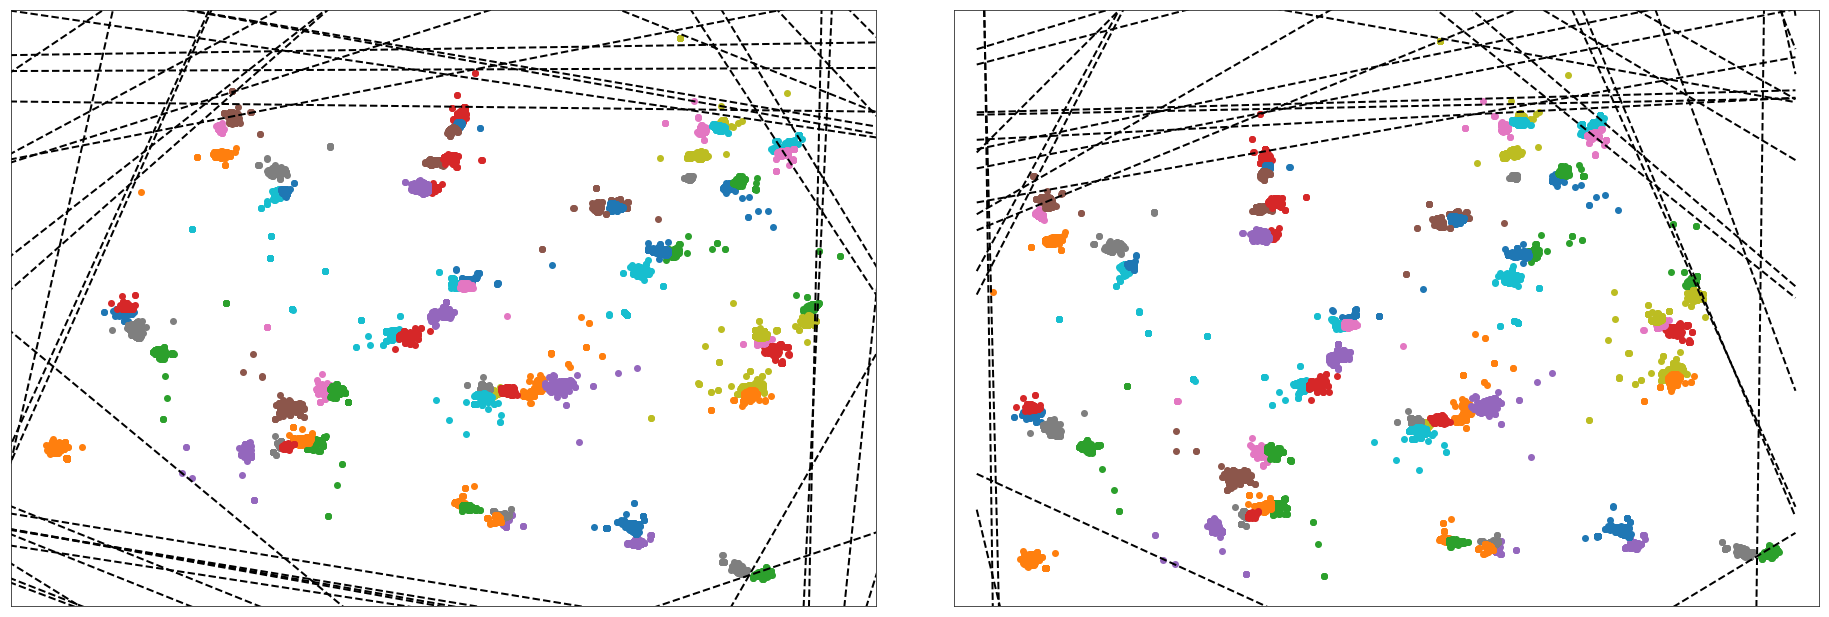

In [46]:
for name, algorithm in [clustering_algorithms[0]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [47]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by MiniBatchKMeans for n_clusters 74
n_clusters orignial 10
n_clusters detected 74
n unclustered points 0 out of 70000
Clustering using MiniBatchKMeans, time elapesd 0.24718427658081055
Clustering Accuracy 0.2195
Clustering purity 0.9534142857142858
Clustering homogeneity 0.9016316142150329
Clustering adjusted_rand_score 0.2331024271435299
Clustering adjusted_mutual_info_score 0.4929133681845567
Clustering completeness_score 0.49348202366666377
Clustering v_measure_score 0.6378534070676259


## Spectral Clustering

In [48]:
import time
for name, algorithm in [clustering_algorithms[1]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting SpectralClustering


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.006214285714285714
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.009914285714285714


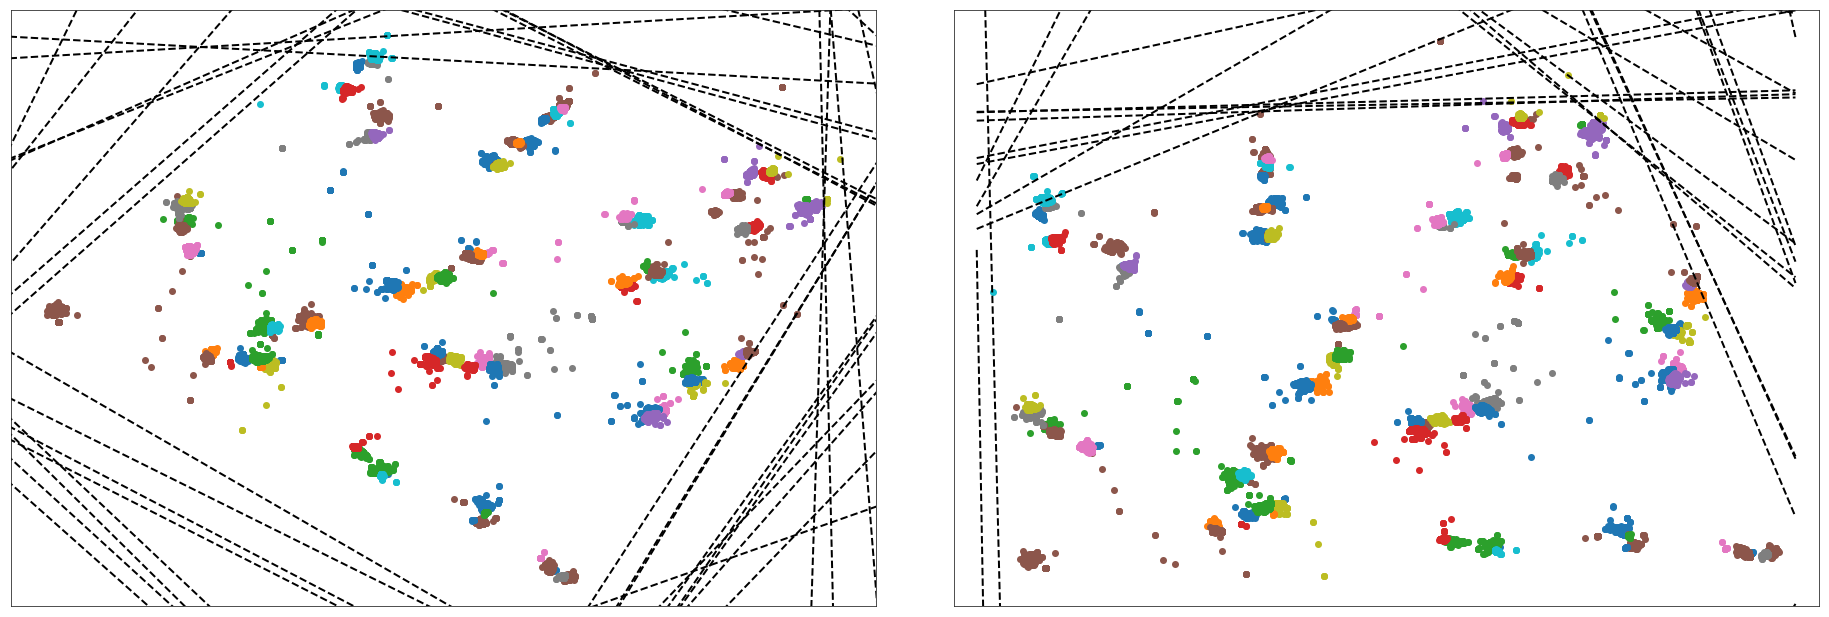

In [49]:
for name, algorithm in [clustering_algorithms[1]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [50]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by SpectralClustering for n_clusters 74
n_clusters orignial 10
n_clusters detected 74
n unclustered points 0 out of 70000
Clustering using SpectralClustering, time elapesd 146.04834938049316
Clustering Accuracy 0.20694285714285715
Clustering purity 0.7534714285714286
Clustering homogeneity 0.6941998073620382
Clustering adjusted_rand_score 0.14056317053963482
Clustering adjusted_mutual_info_score 0.4277421787702377
Clustering completeness_score 0.4284720212260393
Clustering v_measure_score 0.5298880528056361


## Ward

In [51]:
import time
for name, algorithm in [clustering_algorithms[2]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Ward


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07128571428571429
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07948571428571428


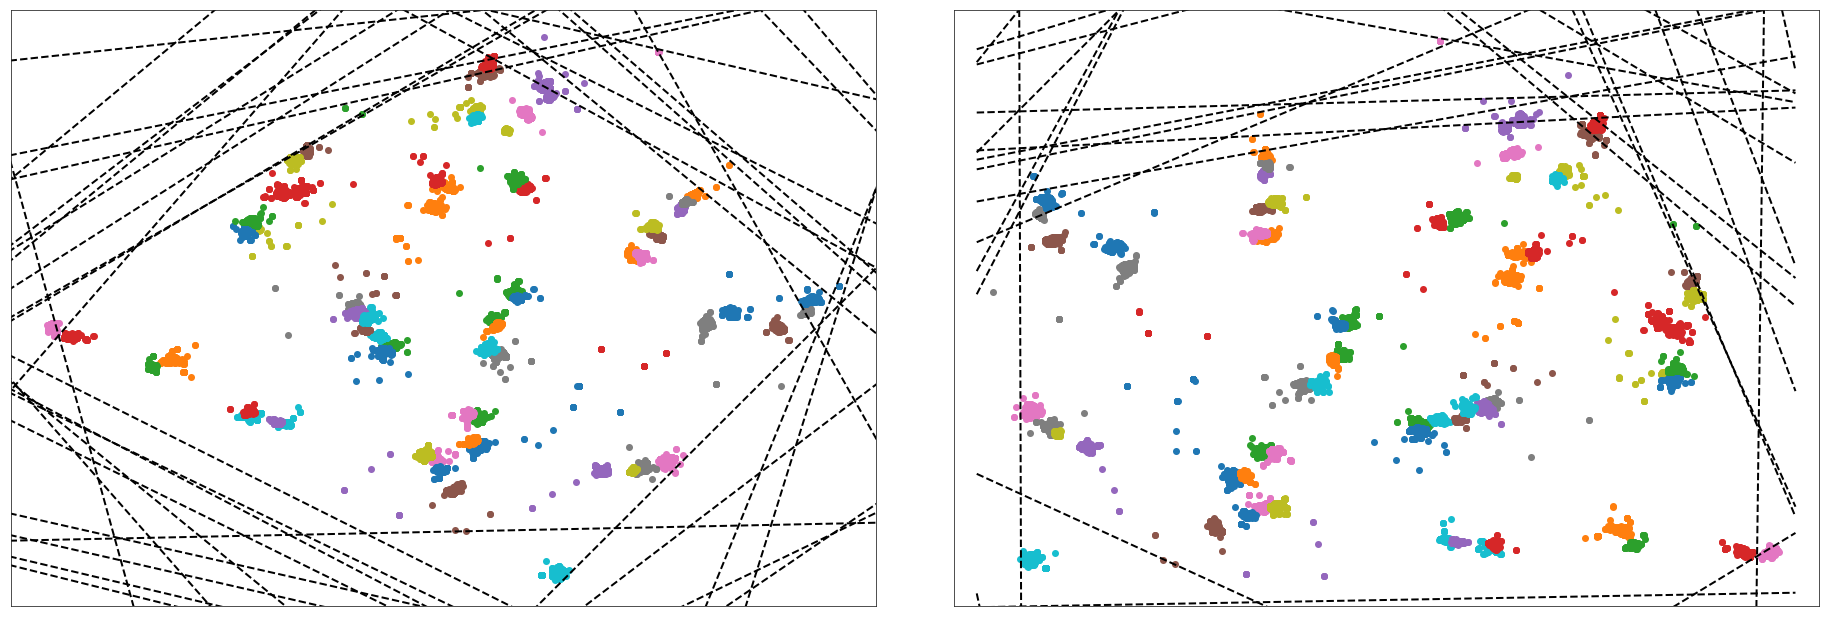

In [52]:
for name, algorithm in [clustering_algorithms[2]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [53]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Ward for n_clusters 74
n_clusters orignial 10
n_clusters detected 74
n unclustered points 0 out of 70000
Clustering using Ward, time elapesd 56.23533320426941
Clustering Accuracy 0.2037857142857143
Clustering purity 0.9544
Clustering homogeneity 0.9034328814193638
Clustering adjusted_rand_score 0.2420273056105163
Clustering adjusted_mutual_info_score 0.5012363096096851
Clustering completeness_score 0.5018106969321311
Clustering v_measure_score 0.6452294688843714


## Birch

In [54]:
import time
for name, algorithm in [clustering_algorithms[3]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting Birch


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.10137142857142857
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.10685714285714286


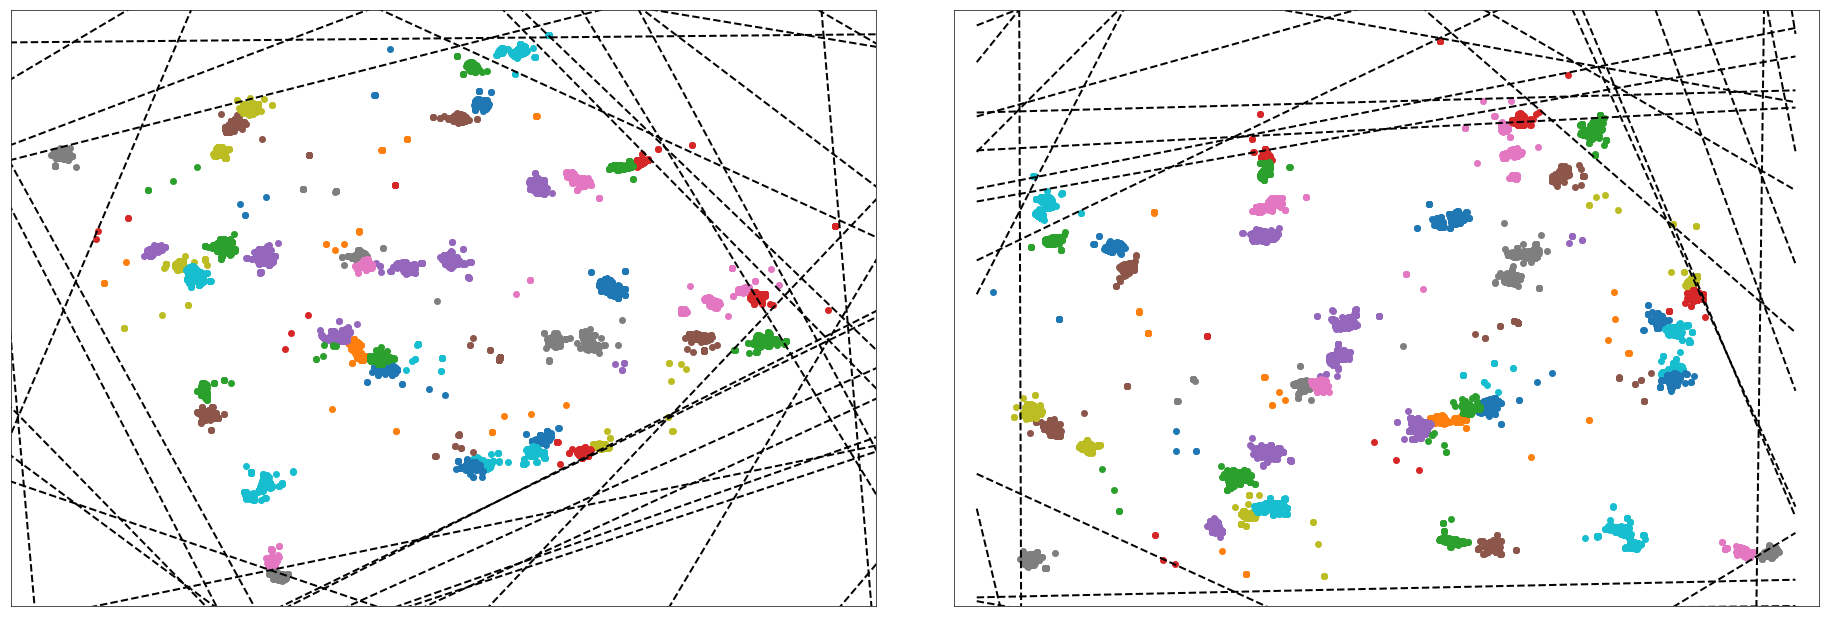

In [55]:
for name, algorithm in [clustering_algorithms[3]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)

### Clustering Metrics

In [56]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by Birch for n_clusters 74
n_clusters orignial 10
n_clusters detected 74
n unclustered points 0 out of 70000
Clustering using Birch, time elapesd 2.1058621406555176
Clustering Accuracy 0.28454285714285715
Clustering purity 0.9550857142857143
Clustering homogeneity 0.9030963947004657
Clustering adjusted_rand_score 0.32749860632621974
Clustering adjusted_mutual_info_score 0.546981190798996
Clustering completeness_score 0.5475461748741471
Clustering v_measure_score 0.6817488840216189


## Gaussian Mixture

In [57]:
import time
for name, algorithm in [clustering_algorithms[4]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting GaussianMixture


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07814285714285714
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.08114285714285714


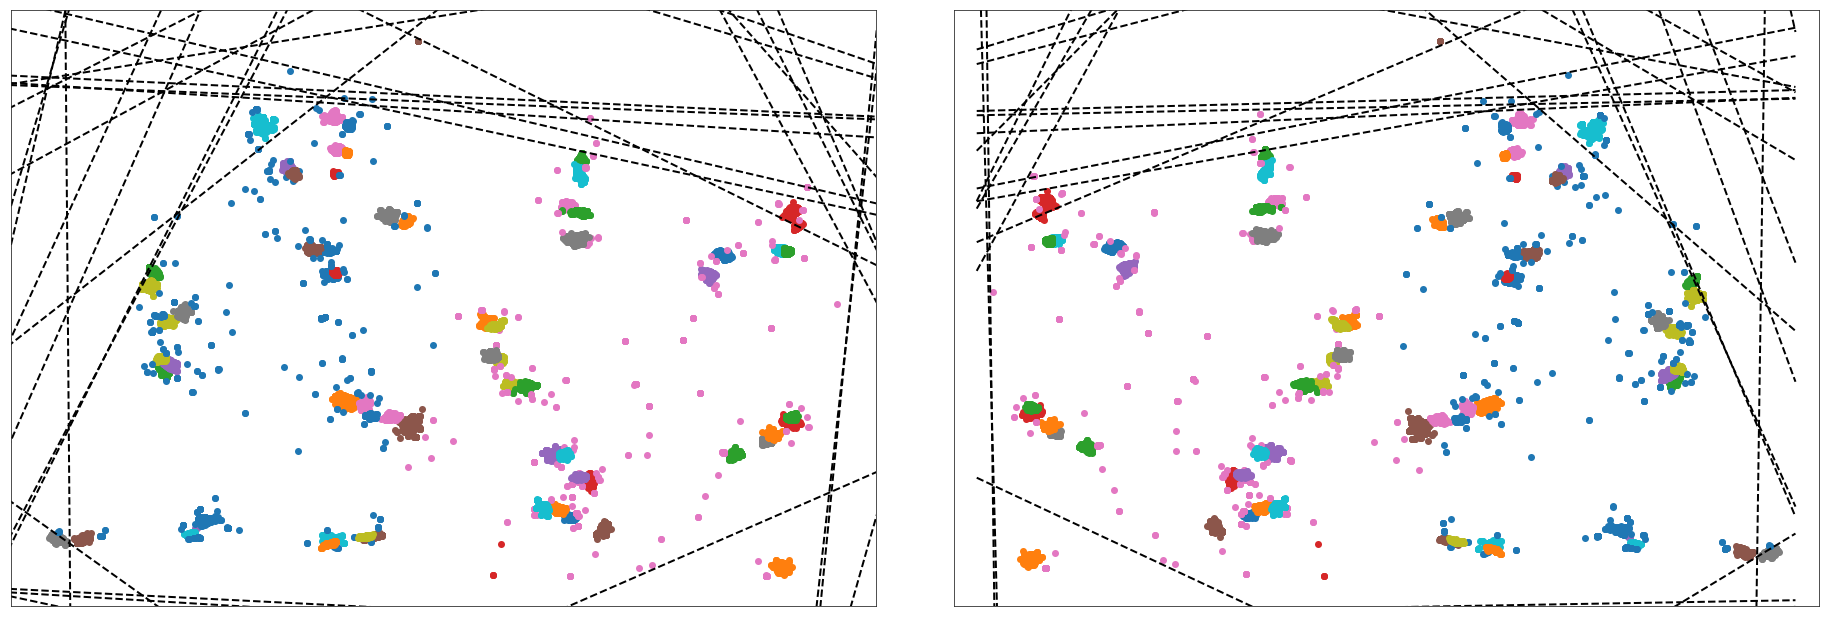

In [58]:
for name, algorithm in [clustering_algorithms[4]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [59]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by GaussianMixture for n_clusters 74
n_clusters orignial 10
n_clusters detected 73
n unclustered points 0 out of 70000
Clustering using GaussianMixture, time elapesd 9.344419479370117
Clustering Accuracy 0.22108571428571427
Clustering purity 0.9523571428571429
Clustering homogeneity 0.9073420292162925
Clustering adjusted_rand_score 0.2345566622823907
Clustering adjusted_mutual_info_score 0.49692014757813097
Clustering completeness_score 0.4974775394037606
Clustering v_measure_score 0.6426195793037347


## DBSCAN

In [60]:
import time
for name, algorithm in [clustering_algorithms[5]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting DBSCAN


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06592857142857143
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07015714285714286


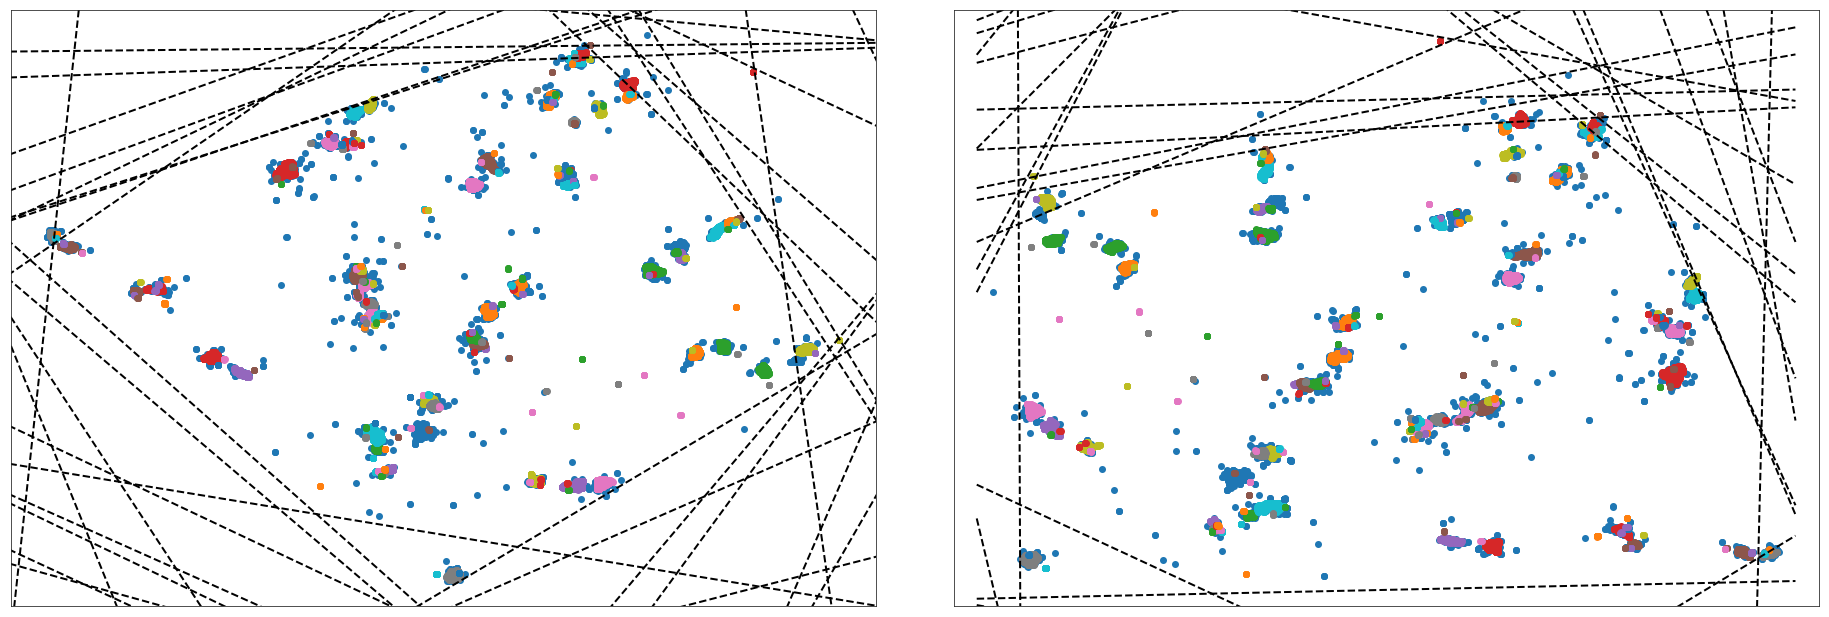

In [61]:
for name, algorithm in [clustering_algorithms[5]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values)
    

### Clustering Metrics

In [62]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by DBSCAN for n_clusters 74
n_clusters orignial 10
n_clusters detected 208
n unclustered points 1992 out of 70000
Clustering using DBSCAN, time elapesd 0.6634058952331543
Clustering Accuracy 0.2775261733913657
Clustering purity 0.9736648629572991
Clustering homogeneity 0.9373847976565883
Clustering adjusted_rand_score 0.30319022353366615
Clustering adjusted_mutual_info_score 0.5340244038716687
Clustering completeness_score 0.5357370682319974
Clustering v_measure_score 0.6818061627221359


## HDBSCAN

In [63]:
import time
for name, algorithm in [clustering_algorithms[6]]:
    t0 = time.time()

    print('fitting {}'.format(name))
    algorithm.fit(Z_embedded)

    t1 = time.time()
    algorithm.__dict__['times'] = t1 - t0


fitting HDBSCAN


C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
C:\ProgramData\Anaconda34\envs\gpu_env\lib\site-packages\sklearn\externals\joblib\parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.06495714285714285
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07097142857142857


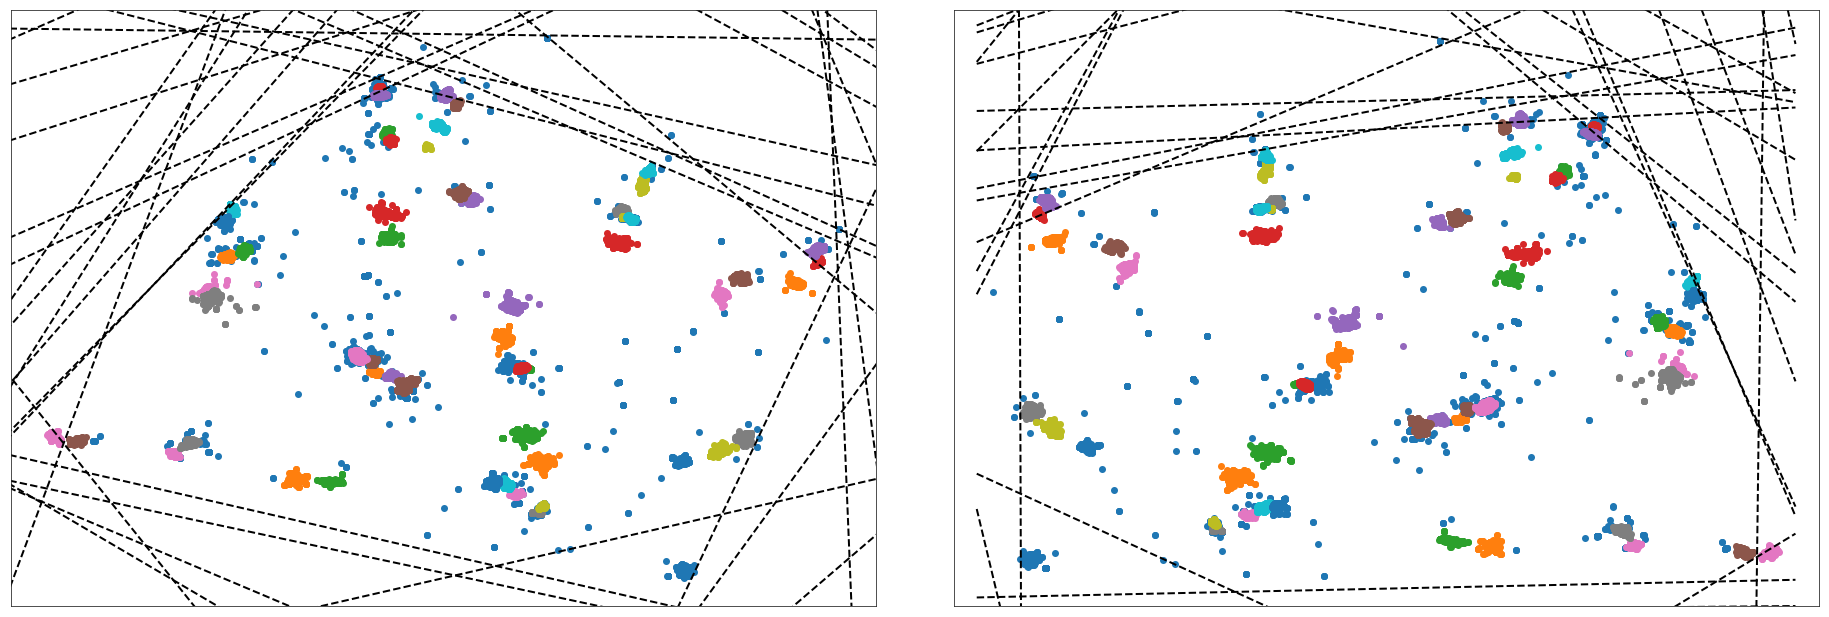

In [64]:
for name, algorithm in [clustering_algorithms[6]]:
    if hasattr(algorithm, 'labels_'):
        y_pred = algorithm.labels_.astype(np.int)
    else:
        y_pred = algorithm.predict(Z_embedded)
        
plot_transform_hyperplanes(Z_embedded, pd.get_dummies(y_pred).values) 

### Clustering Metrics

In [65]:
evaluate_clustering(name,n_clusters, y, y_pred, algorithm.__dict__['times'])

clustering by HDBSCAN for n_clusters 74
n_clusters orignial 10
n_clusters detected 57
n unclustered points 1232 out of 70000
Clustering using HDBSCAN, time elapesd 1.9857680797576904
Clustering Accuracy 0.267624476500698
Clustering purity 0.9646201721731038
Clustering homogeneity 0.9171763445793312
Clustering adjusted_rand_score 0.30027026569396703
Clustering adjusted_mutual_info_score 0.5377300698954809
Clustering completeness_score 0.5381554377414058
Clustering v_measure_score 0.6783105312467818


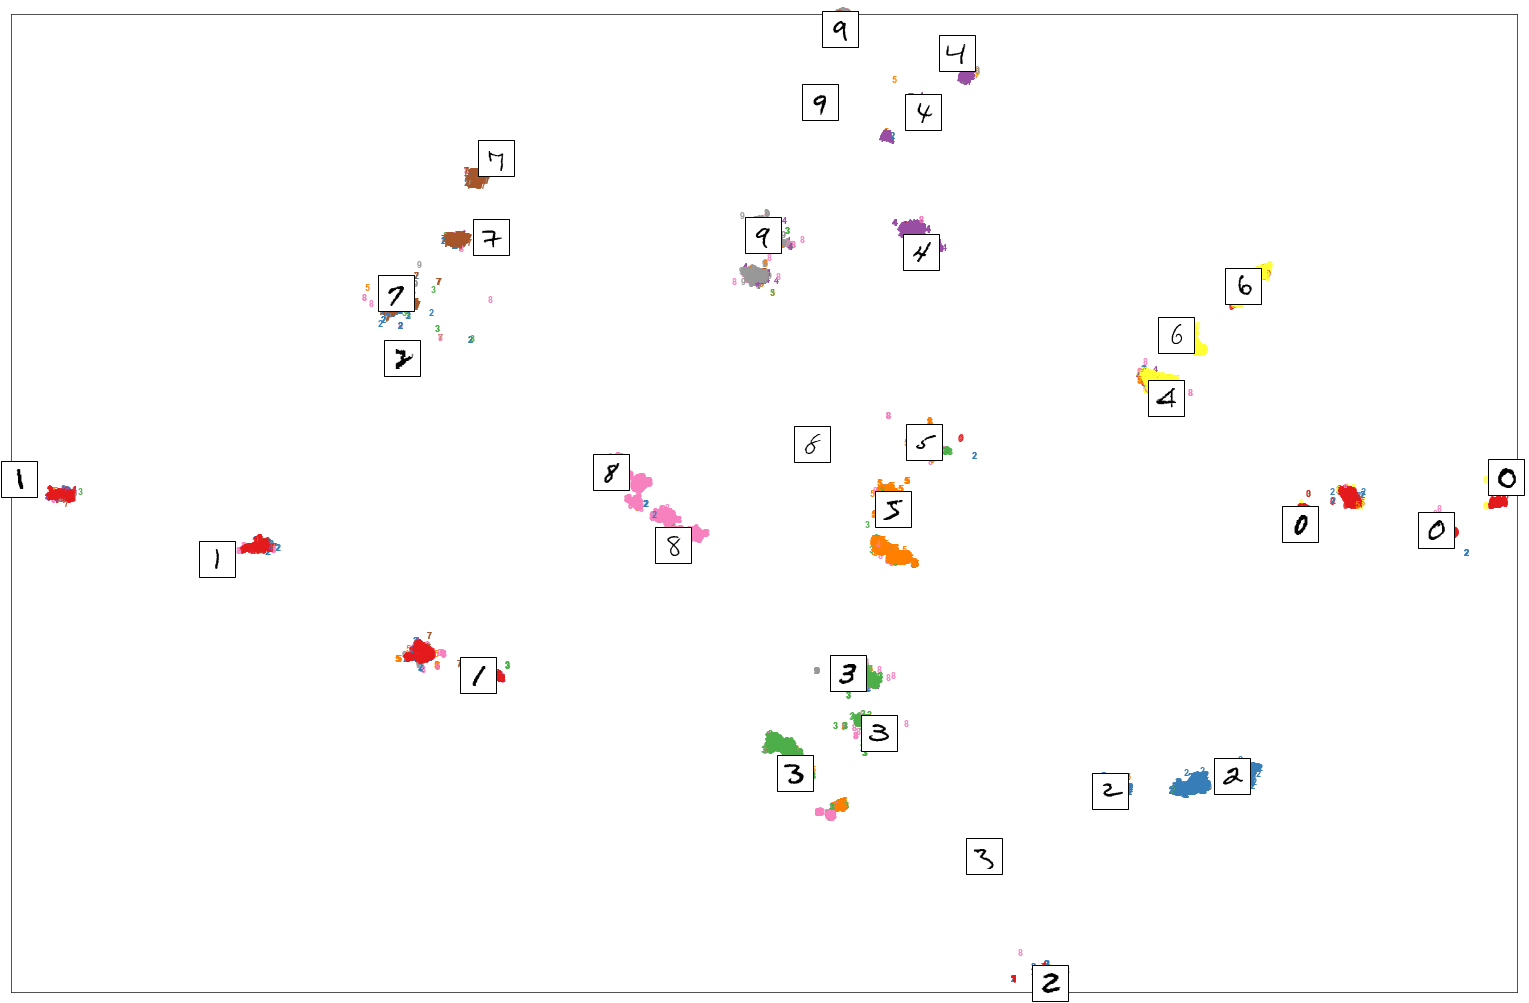

In [66]:
plot_dataset(Z_embedded[y_pred!=-1], y[y_pred!=-1],images=imgs[y_pred!=-1]) 

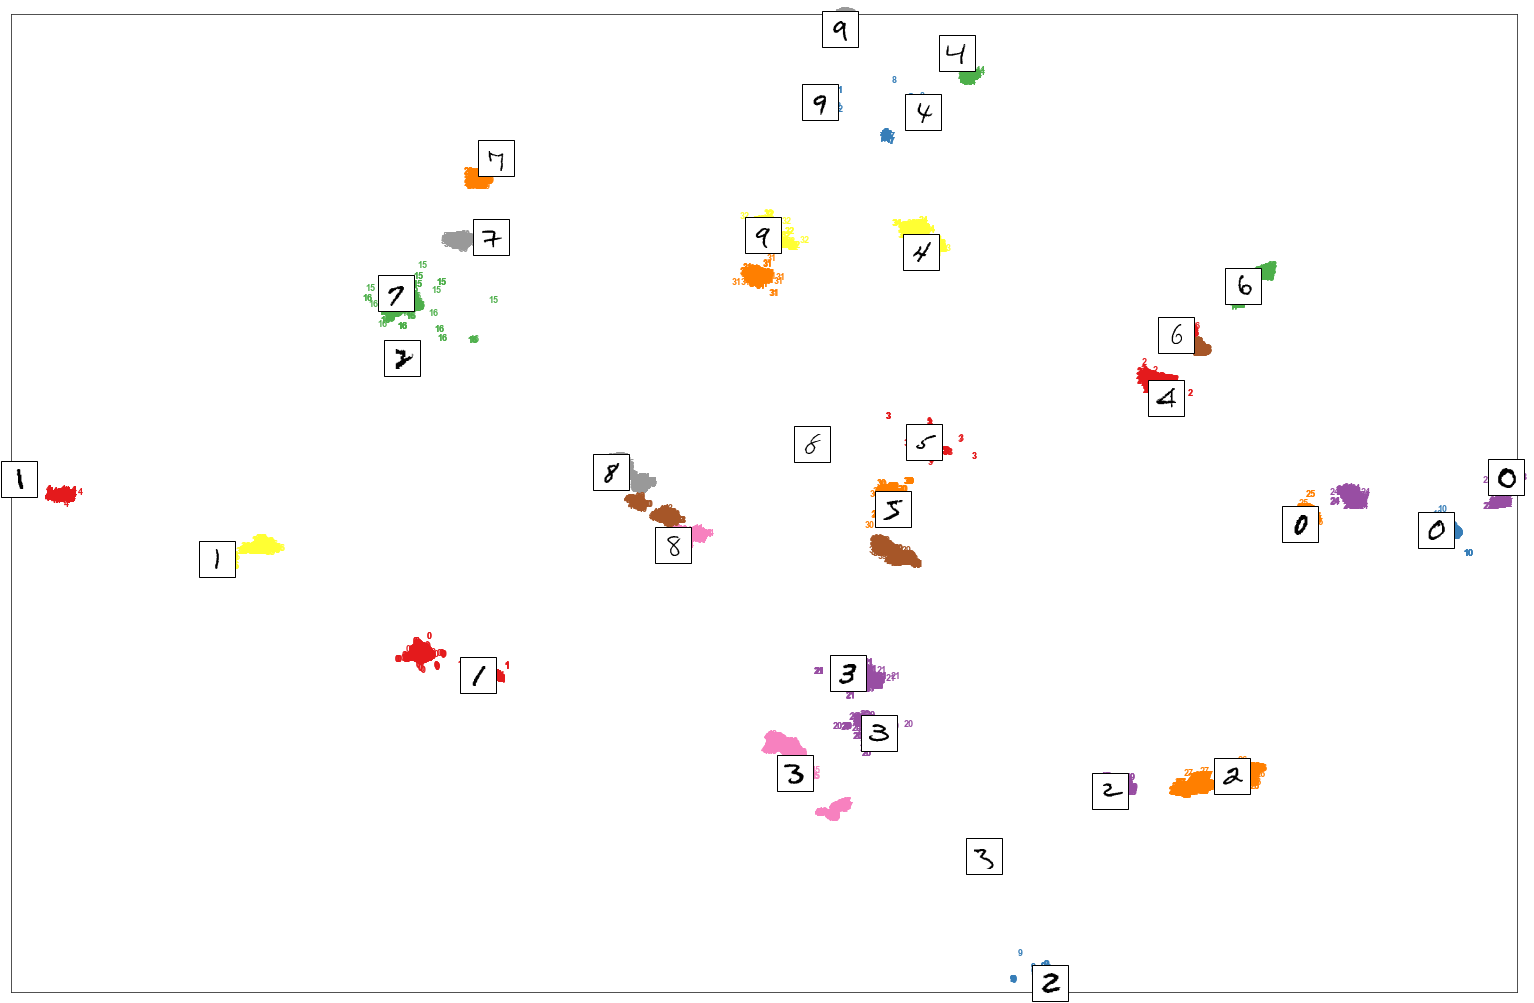

In [67]:
plot_dataset(Z_embedded[y_pred!=-1], y_pred[y_pred!=-1],images=imgs[y_pred!=-1])

cca + OneVsRestClassifier + LogisticRegression accuracy_score 0.07401698464402047
pca + OneVsRestClassifier + LogisticRegression accuracy_score 0.08387622149837133


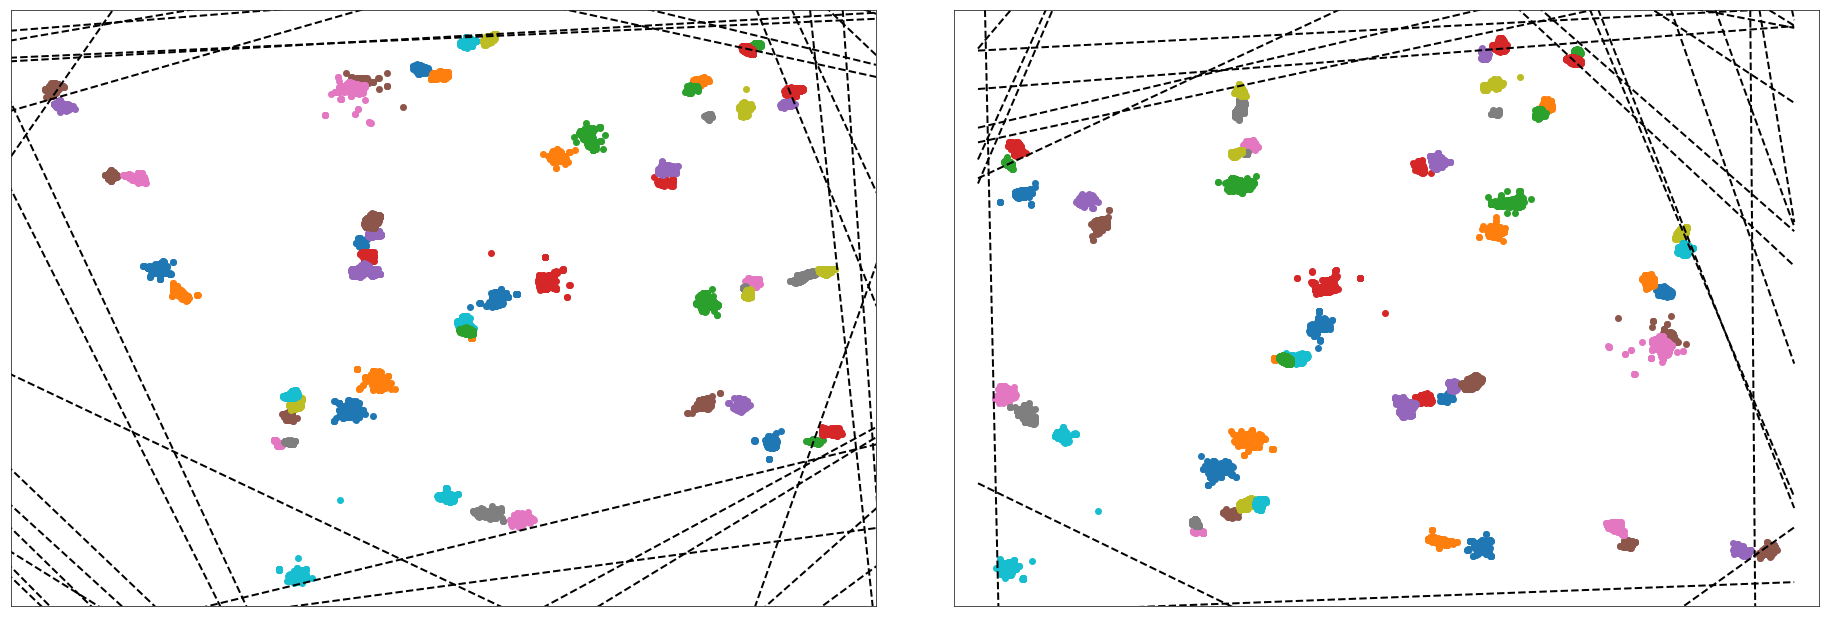

In [68]:
plot_transform_hyperplanes(Z_embedded[y_pred!=-1], pd.get_dummies(y_pred[y_pred!=-1]).values)
    

In [69]:
embedding_Z_space = {'X': X[y_pred!=-1], 
                     'Z': Z_embedded[y_pred!=-1], 
                     'y_cluster': y_pred[y_pred!=-1],
                     'images':imgs[y_pred!=-1]} 

In [70]:
import pickle
with open('./experiments/manifold generation/{}_{}.pkl'.format(dataset_name, name), 'wb') as f:
    # Pickle the 'data' dictionary using the highest protocol available.
    pickle.dump(embedding_Z_space, f, pickle.HIGHEST_PROTOCOL)
    